# Recruit Restaurant Visitor Forecasting

Running a thriving local restaurant isn't always as charming as first impressions appear. There are often all sorts of unexpected troubles popping up that could hurt business.

One common predicament is that restaurants need to know how many customers to expect each day to effectively purchase ingredients and schedule staff members. This forecast isn't easy to make because many unpredictable factors affect restaurant attendance, like weather and local competition. It's even harder for newer restaurants with little historical data.

Recruit Holdings has unique access to key datasets that could make automated future customer prediction possible. Specifically, Recruit Holdings owns Hot Pepper Gourmet (a restaurant review service), AirREGI (a restaurant point of sales service), and Restaurant Board (reservation log management software).

In this competition, you're challenged to use reservation and visitation data to predict the total number of visitors to a restaurant for future dates. This information will help restaurants be much more efficient and allow them to focus on creating an enjoyable dining experience for their customers.

![RECRUIT](https://i.imgur.com/3GsnaT1.png)

### Machine Learning

Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets.

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

We'll look at several examples of each of the above in future tutorials. Here's how the relationship between these three components can be visualized:

<img src="https://i.imgur.com/oiGQFJ9.png" width="480">


Here the loss function is `root mean squared logarithmic error` . Submissions are evaluated on the root mean squared logarithmic error.

The RMSLE is calculated as


where:

![RMSLE](https://i.imgur.com/vuqzztd.png)


\\(n\\) is the total number of observations
\\(p_i\\) is your prediction of visitors
\\(a_i\\) is the actual number of visitors
\\(\log(x)\\) is the natural logarithm of \\(x\\)

RMSLE incurs a larger penalty for the underestimation of the Actual variable than the Overestimation.

In simple words, more penalty is incurred when the predicted Value is less than the Actual Value. On the other hand, Less penalty is incurred when the predicted value is more than the actual value.

## How to Run the Code and Save Your Work

**Option 1: Running using free online resources (1-click, recommended):** The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. This will set up a cloud-based Jupyter notebook server and allow you to modify/execute the code.


**Option 2: Running on your computer locally:** To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

**Saving your work**: You can save a snapshot of the assignment to your [Jovian](https://jovian.ai) profile, so that you can access it later and continue your work. Keep saving your work by running `jovian.commit` from time to time.

## Steps to Follow

> Download the dataset  
> Exploring the dataset  
> Prepare the dataset for training  
> Training a baseline model  
> Train & Evaluate Different Models

## Download the Dataset

The steps need to do in this section are:

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

### Install required libraries

In [1]:
#Install required libraries
! pip install  jovian scikit-learn seaborn  xgboost graphviz lightgbm opendatasets pandas numpy matplotlib seaborn folium  --q

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import zipfile
import folium
import sklearn
import jovian

We'll use the opendatasets library to download the [dataset](https://www.kaggle.com/competitions/recruit-restaurant-visitor-forecasting). You'll need to upload your Kaggle API key (a file called kaggle.json) to Colab.



### Download data from Kaggle

This is a time-series forecasting problem centered around restaurant visitors. The data comes from two separate sites:

Hot Pepper Gourmet (hpg): similar to Yelp, here users can search restaurants and also make a reservation online
AirREGI / Restaurant Board (air): similar to Square, a reservation control and cash register system
You must use the reservations, visits, and other information from these sites to forecast future restaurant visitor totals on a given date. The training data covers the dates from 2016 until April 2017. The test set covers the last week of April and May of 2017. The test set is split based on time (the public fold coming first, the private fold following the public) and covers a chosen subset of the air restaurants. Note that the test set intentionally spans a holiday week in Japan called the "Golden Week."

In [3]:
dataset_url = 'https://www.kaggle.com/competitions/recruit-restaurant-visitor-forecasting'

In [4]:
od.download(dataset_url)

Skipping, found downloaded files in "./recruit-restaurant-visitor-forecasting" (use force=True to force download)


In [5]:
dir = '/content/recruit-restaurant-visitor-forecasting/unzip_source_folder'

### View dataset files

Let us look at the size, number of lines and first few lines of  files.

In [6]:
! ls -lh {dir}

total 136M
-rw-r--r-- 1 root root 5.6M Oct 31 01:47 air_reserve.csv
-rw-r--r-- 1 root root  73K Oct 31 01:47 air_store_info.csv
-rw-r--r-- 1 root root 8.4M Oct 31 01:47 air_visit_data.csv
-rw-r--r-- 1 root root  11K Oct 31 01:47 date_info.csv
-rw-r--r-- 1 root root 121M Oct 31 01:47 hpg_reserve.csv
-rw-r--r-- 1 root root 468K Oct 31 01:47 hpg_store_info.csv
-rw-r--r-- 1 root root 1.1M Oct 31 01:47 sample_submission.csv
-rw-r--r-- 1 root root 6.2K Oct 31 01:47 store_id_relation.csv


In [7]:
unzipped_folder_path = '/content/recruit-restaurant-visitor-forecasting/unzip_source_folder'
subfolders=['air_reserve.csv.zip','air_store_info.csv.zip','air_visit_data.csv.zip','date_info.csv.zip','hpg_reserve.csv.zip','hpg_store_info.csv.zip','store_id_relation.csv.zip','sample_submission.csv.zip']

In [8]:
for subfolder in subfolders:
  with zipfile.ZipFile('/content/recruit-restaurant-visitor-forecasting/'+subfolder,'r') as zip_ref:
      zip_ref.extractall(unzipped_folder_path)


In [9]:
! head  {dir}/air_visit_data.csv

air_store_id,visit_date,visitors
air_ba937bf13d40fb24,2016-01-13,25
air_ba937bf13d40fb24,2016-01-14,32
air_ba937bf13d40fb24,2016-01-15,29
air_ba937bf13d40fb24,2016-01-16,22
air_ba937bf13d40fb24,2016-01-18,6
air_ba937bf13d40fb24,2016-01-19,9
air_ba937bf13d40fb24,2016-01-20,31
air_ba937bf13d40fb24,2016-01-21,21
air_ba937bf13d40fb24,2016-01-22,18


In [10]:
#number of lines in the test data
!wc -l {dir}/sample_submission.csv

32020 /content/recruit-restaurant-visitor-forecasting/unzip_source_folder/sample_submission.csv


In [11]:
air_reserve = pd.read_csv(unzipped_folder_path+'/air_reserve.csv')
air_store_info=pd.read_csv(unzipped_folder_path+'/air_store_info.csv')
air_visit_data= pd.read_csv(unzipped_folder_path+'/air_visit_data.csv')
date_info=pd.read_csv(unzipped_folder_path+'/date_info.csv')
hpg_reserve = pd.read_csv(unzipped_folder_path+'/hpg_reserve.csv')
hpg_store_info=pd.read_csv(unzipped_folder_path+'/hpg_store_info.csv')
store_id_relation =pd.read_csv(unzipped_folder_path+'/store_id_relation.csv')
sample_submission =pd.read_csv(unzipped_folder_path+'/sample_submission.csv')

In [12]:
air_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   air_store_id      92378 non-null  object
 1   visit_datetime    92378 non-null  object
 2   reserve_datetime  92378 non-null  object
 3   reserve_visitors  92378 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [13]:
air_store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   air_store_id    829 non-null    object 
 1   air_genre_name  829 non-null    object 
 2   air_area_name   829 non-null    object 
 3   latitude        829 non-null    float64
 4   longitude       829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


In [14]:
air_visit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   air_store_id  252108 non-null  object
 1   visit_date    252108 non-null  object
 2   visitors      252108 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


In [15]:
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   calendar_date  517 non-null    object
 1   day_of_week    517 non-null    object
 2   holiday_flg    517 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.2+ KB


In [16]:
hpg_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   hpg_store_id      object
 1   visit_datetime    object
 2   reserve_datetime  object
 3   reserve_visitors  int64 
dtypes: int64(1), object(3)
memory usage: 61.0+ MB


In [17]:
hpg_store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hpg_store_id    4690 non-null   object 
 1   hpg_genre_name  4690 non-null   object 
 2   hpg_area_name   4690 non-null   object 
 3   latitude        4690 non-null   float64
 4   longitude       4690 non-null   float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


In [18]:
store_id_relation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   air_store_id  150 non-null    object
 1   hpg_store_id  150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [19]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32019 entries, 0 to 32018
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        32019 non-null  object
 1   visitors  32019 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.4+ KB


##### Observations
* The file is of size 27MB.
* This is a supervised regression problem.
* This is a relational dataset from two systems. Each file is prefaced with the source (either air_ or hpg_) to indicate its origin. Each restaurant has a unique air_store_id and hpg_store_id.All restaurants are not covered by both systems, and that you have been provided data beyond the restaurants for which you must forecast. Latitudes and Longitudes are not exact to discourage de-identification of restaurants.

* air_reserve.csv  
>This file contains reservations made in the air system. Note that the reserve_datetime indicates the time when the reservation was created, whereas the visit_datetime is the time in the future where the visit will occur.
air_store_id - the restaurant's id in the air system  
visit_datetime - the time of the reservation  
reserve_datetime - the time the reservation was made  
reserve_visitors - the number of visitors for that reservation  


* hpg_reserve.csv  
>This file contains reservations made in the hpg system.
hpg_store_id - the restaurant's id in the hpg system
visit_datetime - the time of the reservation
reserve_datetime - the time the reservation was made
reserve_visitors - the number of visitors for that reservation  


* air_store_info.csv
>This file contains information about select air restaurants. Column names and contents are self-explanatory.  
air_store_id  
air_genre_name  
air_area_name  
latitude  
longitude  
Note: latitude and longitude are the latitude and longitude of the area to which the store belongs  

* hpg_store_info.csv
>This file contains information about select hpg restaurants. Column names and contents are self-explanatory.  
hpg_store_id  
hpg_genre_name  
hpg_area_name  
latitude  
longitude  
Note: latitude and longitude are the latitude and longitude of the area to which the store belongs  

* store_id_relation.csv
>This file allows you to join select restaurants that have both the air and hpg system.  
hpg_store_id  
air_store_id  

* air_visit_data.csv  
>This file contains historical visit data for the air restaurants.  
air_store_id  
visit_date - the date  
visitors - the number of visitors to the restaurant on the date  

* sample_submission.csv  
>This file shows a submission in the correct format, including the days for which you must forecast.  
id - the id is formed by concatenating the air_store_id and visit_date with an underscore  
visitors- the number of visitors forecasted for the store and date combination  

* date_info.csv
>This file gives basic information about the calendar dates in the dataset.  
calendar_date  
day_of_week  
holiday_flg - is the day a holiday in Japan  

### Load training set with Pandas

Converting to datetime format

In [20]:
air_store_info.rename(columns={'air_genre_name':'genre_name','air_area_name':'area_name'},inplace=True)
hpg_store_info.rename(columns={'hpg_genre_name':'genre_name','hpg_area_name':'area_name'},inplace=True)

In [21]:
 #converting to dataframe
air_reserve['visit_datetime']= pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['reserve_datetime']= pd.to_datetime(air_reserve['reserve_datetime'])
hpg_reserve['visit_datetime']= pd.to_datetime(hpg_reserve['visit_datetime'])
hpg_reserve['reserve_datetime']= pd.to_datetime(hpg_reserve['reserve_datetime'])

In [22]:
hpg_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data columns (total 4 columns):
 #   Column            Dtype         
---  ------            -----         
 0   hpg_store_id      object        
 1   visit_datetime    datetime64[ns]
 2   reserve_datetime  datetime64[ns]
 3   reserve_visitors  int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 61.0+ MB


In [23]:
air_reserve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   air_store_id      92378 non-null  object        
 1   visit_datetime    92378 non-null  datetime64[ns]
 2   reserve_datetime  92378 non-null  datetime64[ns]
 3   reserve_visitors  92378 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.8+ MB


In [24]:
data_hpg = pd.merge(hpg_reserve,hpg_store_info,how='left',on='hpg_store_id')

In [25]:
data_hpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000320 entries, 0 to 2000319
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   hpg_store_id      object        
 1   visit_datetime    datetime64[ns]
 2   reserve_datetime  datetime64[ns]
 3   reserve_visitors  int64         
 4   genre_name        object        
 5   area_name         object        
 6   latitude          float64       
 7   longitude         float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 137.4+ MB


In [26]:
hpg_air_inner=pd.merge(data_hpg,store_id_relation,on='hpg_store_id',how='inner')

In [27]:
hpg_air_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28183 entries, 0 to 28182
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   hpg_store_id      28183 non-null  object        
 1   visit_datetime    28183 non-null  datetime64[ns]
 2   reserve_datetime  28183 non-null  datetime64[ns]
 3   reserve_visitors  28183 non-null  int64         
 4   genre_name        13528 non-null  object        
 5   area_name         13528 non-null  object        
 6   latitude          13528 non-null  float64       
 7   longitude         13528 non-null  float64       
 8   air_store_id      28183 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 2.2+ MB


In [28]:
hpg_air_inner

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,genre_name,area_name,latitude,longitude,air_store_id
0,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
1,hpg_878cc70b1abc76f7,2016-01-02 19:00:00,2016-01-02 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
2,hpg_878cc70b1abc76f7,2016-01-03 18:00:00,2016-01-02 20:00:00,6,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
3,hpg_878cc70b1abc76f7,2016-01-06 20:00:00,2016-01-04 22:00:00,3,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
4,hpg_878cc70b1abc76f7,2016-01-11 18:00:00,2016-01-11 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
...,...,...,...,...,...,...,...,...,...
28178,hpg_0f78ef8d1e4b23d8,2017-04-01 21:00:00,2017-03-10 20:00:00,2,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7
28179,hpg_0f78ef8d1e4b23d8,2017-04-02 17:00:00,2017-04-02 14:00:00,2,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7
28180,hpg_0f78ef8d1e4b23d8,2017-04-08 19:00:00,2017-04-03 12:00:00,3,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7
28181,hpg_0f78ef8d1e4b23d8,2017-04-08 20:00:00,2017-03-09 07:00:00,4,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7


In [29]:
hpg_air_inner.drop(['hpg_store_id'],axis=1,inplace=True)

In [30]:
hpg_air_inner

,visit_datetime,reserve_datetime,reserve_visitors,genre_name,area_name,latitude,longitude,air_store_id
0,2016-01-01 19:00:00,2016-01-01 15:00:00,4,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
1,2016-01-02 19:00:00,2016-01-02 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
2,2016-01-03 18:00:00,2016-01-02 20:00:00,6,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
3,2016-01-06 20:00:00,2016-01-04 22:00:00,3,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
4,2016-01-11 18:00:00,2016-01-11 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
...,...,...,...,...,...,...,...,...
28178,2017-04-01 21:00:00,2017-03-10 20:00:00,2,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7
28179,2017-04-02 17:00:00,2017-04-02 14:00:00,2,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7
28180,2017-04-08 19:00:00,2017-04-03 12:00:00,3,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7
28181,2017-04-08 20:00:00,2017-03-09 07:00:00,4,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7


In [31]:
hpg_air_inner.rename(columns = {'air_store_id':'store_id','hpg_genre_name':'genre_name','hpg_area_name':'area_name','reserve_visitors':'visitors'}, inplace = True)

In [32]:
hpg_air_inner

,visit_datetime,reserve_datetime,visitors,genre_name,area_name,latitude,longitude,store_id
0,2016-01-01 19:00:00,2016-01-01 15:00:00,4,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
1,2016-01-02 19:00:00,2016-01-02 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
2,2016-01-03 18:00:00,2016-01-02 20:00:00,6,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
3,2016-01-06 20:00:00,2016-01-04 22:00:00,3,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
4,2016-01-11 18:00:00,2016-01-11 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
...,...,...,...,...,...,...,...,...
28178,2017-04-01 21:00:00,2017-03-10 20:00:00,2,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7
28179,2017-04-02 17:00:00,2017-04-02 14:00:00,2,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7
28180,2017-04-08 19:00:00,2017-04-03 12:00:00,3,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7
28181,2017-04-08 20:00:00,2017-03-09 07:00:00,4,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7


In [33]:
data_air = pd.merge(air_reserve,air_store_info,how='left',on = 'air_store_id')


In [34]:
data_air.rename(columns = {'air_store_id':'store_id','air_genre_name':'genre_name','air_area_name':'area_name','reserve_visitors':'visitors'}, inplace = True)

In [35]:
data_air

,store_id,visit_datetime,reserve_datetime,visitors,genre_name,area_name,latitude,longitude
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,Dining bar,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819
...,...,...,...,...,...,...,...,...
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8,Izakaya,Tōkyō-to Kōtō-ku Tomioka,35.671270,139.796987
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10,Italian/French,Tōkyō-to Chūō-ku Ginza,35.672114,139.770825


In [36]:
hpg_air_reserve = pd.concat([hpg_air_inner,data_air])

In [37]:
hpg_air_reserve

,visit_datetime,reserve_datetime,visitors,genre_name,area_name,latitude,longitude,store_id
0,2016-01-01 19:00:00,2016-01-01 15:00:00,4,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
1,2016-01-02 19:00:00,2016-01-02 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
2,2016-01-03 18:00:00,2016-01-02 20:00:00,6,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
3,2016-01-06 20:00:00,2016-01-04 22:00:00,3,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
4,2016-01-11 18:00:00,2016-01-11 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
...,...,...,...,...,...,...,...,...
92373,2017-05-29 18:00:00,2017-04-17 19:00:00,6,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,air_db4b38ebe7a7ceff
92374,2017-05-30 23:00:00,2017-04-19 17:00:00,8,Izakaya,Tōkyō-to Kōtō-ku Tomioka,35.671270,139.796987,air_1033310359ceeac1
92375,2017-05-31 20:00:00,2017-04-12 23:00:00,3,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,air_877f79706adbfb06
92376,2017-05-31 20:00:00,2017-04-19 16:00:00,10,Italian/French,Tōkyō-to Chūō-ku Ginza,35.672114,139.770825,air_900d755ebd2f7bbd


In [38]:
  hpg_air_reserve.dropna(subset=['visit_datetime'])

,visit_datetime,reserve_datetime,visitors,genre_name,area_name,latitude,longitude,store_id
0,2016-01-01 19:00:00,2016-01-01 15:00:00,4,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
1,2016-01-02 19:00:00,2016-01-02 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
2,2016-01-03 18:00:00,2016-01-02 20:00:00,6,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
3,2016-01-06 20:00:00,2016-01-04 22:00:00,3,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
4,2016-01-11 18:00:00,2016-01-11 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
...,...,...,...,...,...,...,...,...
92373,2017-05-29 18:00:00,2017-04-17 19:00:00,6,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,air_db4b38ebe7a7ceff
92374,2017-05-30 23:00:00,2017-04-19 17:00:00,8,Izakaya,Tōkyō-to Kōtō-ku Tomioka,35.671270,139.796987,air_1033310359ceeac1
92375,2017-05-31 20:00:00,2017-04-12 23:00:00,3,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,air_877f79706adbfb06
92376,2017-05-31 20:00:00,2017-04-19 16:00:00,10,Italian/French,Tōkyō-to Chūō-ku Ginza,35.672114,139.770825,air_900d755ebd2f7bbd


In [39]:
hpg_air_reserve.head()

,visit_datetime,reserve_datetime,visitors,genre_name,area_name,latitude,longitude,store_id
0,2016-01-01 19:00:00,2016-01-01 15:00:00,4,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
1,2016-01-02 19:00:00,2016-01-02 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
2,2016-01-03 18:00:00,2016-01-02 20:00:00,6,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
3,2016-01-06 20:00:00,2016-01-04 22:00:00,3,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
4,2016-01-11 18:00:00,2016-01-11 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926


In [40]:
hpg_air_reserve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120561 entries, 0 to 92377
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   visit_datetime    120561 non-null  datetime64[ns]
 1   reserve_datetime  120561 non-null  datetime64[ns]
 2   visitors          120561 non-null  int64         
 3   genre_name        105906 non-null  object        
 4   area_name         105906 non-null  object        
 5   latitude          105906 non-null  float64       
 6   longitude         105906 non-null  float64       
 7   store_id          120561 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 8.3+ MB


In [41]:
#hpg_air_reserve.to_csv('/content/drive/MyDrive/JOVIAN/machinelearning_jovian/hpg_air_reserve.csv',index=False)

In [42]:
reserve_train_data = hpg_air_reserve.drop(['reserve_datetime'],axis=1)
reserve_train_data.head()

,visit_datetime,visitors,genre_name,area_name,latitude,longitude,store_id
0,2016-01-01 19:00:00,4,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
1,2016-01-02 19:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
2,2016-01-03 18:00:00,6,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
3,2016-01-06 20:00:00,3,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
4,2016-01-11 18:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926


In [43]:
reserve_train_data.rename(columns={'visit_datetime':'visit_date'},inplace=True)
reserve_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120561 entries, 0 to 92377
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   visit_date  120561 non-null  datetime64[ns]
 1   visitors    120561 non-null  int64         
 2   genre_name  105906 non-null  object        
 3   area_name   105906 non-null  object        
 4   latitude    105906 non-null  float64       
 5   longitude   105906 non-null  float64       
 6   store_id    120561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 7.4+ MB


In [44]:
reserve_train_data['visit_date'] = pd.to_datetime(reserve_train_data['visit_date']).dt.date
reserve_train_data.head()

,visit_date,visitors,genre_name,area_name,latitude,longitude,store_id
0,2016-01-01,4,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
1,2016-01-02,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
2,2016-01-03,6,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
3,2016-01-06,3,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
4,2016-01-11,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926


In [45]:
reserve_train_data=reserve_train_data[['store_id','visit_date','genre_name','area_name','latitude','longitude','visitors']]

In [46]:
visits_train_data=air_visit_data.merge(air_store_info,how='left',on='air_store_id')

In [47]:
visits_train_data.dropna(inplace=True)

In [48]:
visits_train_data

,air_store_id,visit_date,visitors,genre_name,area_name,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_ba937bf13d40fb24,2016-01-15,29,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_ba937bf13d40fb24,2016-01-16,22,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_ba937bf13d40fb24,2016-01-18,6,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
...,...,...,...,...,...,...,...
252103,air_24e8414b9b07decb,2017-04-18,6,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036
252104,air_24e8414b9b07decb,2017-04-19,6,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036
252105,air_24e8414b9b07decb,2017-04-20,7,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036
252106,air_24e8414b9b07decb,2017-04-21,8,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036


In [49]:
visits_train_data.rename(columns ={'air_store_id':'store_id','air_genre_name':'genre_name','air_area_name':'area_name'},inplace=True)

In [50]:
train_data = pd.concat([reserve_train_data,visits_train_data])

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372669 entries, 0 to 252107
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   store_id    372669 non-null  object 
 1   visit_date  372669 non-null  object 
 2   genre_name  358014 non-null  object 
 3   area_name   358014 non-null  object 
 4   latitude    358014 non-null  float64
 5   longitude   358014 non-null  float64
 6   visitors    372669 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 22.7+ MB


In [52]:
date_info.rename(columns={'calendar_date':'visit_date'},inplace=True)
date_info['visit_date']=pd.to_datetime(date_info['visit_date'])
train_data['visit_date']=pd.to_datetime(train_data['visit_date'])

In [53]:
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   visit_date   517 non-null    datetime64[ns]
 1   day_of_week  517 non-null    object        
 2   holiday_flg  517 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.2+ KB


### Feature engineering

The dataset is time series because we have timestamp column in our data. Using this time feature directly will not help in any way beacuse model will not learn anything from this time column. So we have to extract useful features from this time column. Here the `visit_date` column is split into Day of Month,Weekday, month and Year.

In [54]:
train_data=train_data.merge(date_info,how='left',on='visit_date')

In [55]:
train_data

,store_id,visit_date,genre_name,area_name,latitude,longitude,visitors,day_of_week,holiday_flg
0,air_db80363d35f10926,2016-01-01,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,4,Friday,1
1,air_db80363d35f10926,2016-01-02,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Saturday,1
2,air_db80363d35f10926,2016-01-03,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,6,Sunday,1
3,air_db80363d35f10926,2016-01-06,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,3,Wednesday,0
4,air_db80363d35f10926,2016-01-11,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Monday,1
...,...,...,...,...,...,...,...,...,...
372664,air_24e8414b9b07decb,2017-04-18,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,6,Tuesday,0
372665,air_24e8414b9b07decb,2017-04-19,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,6,Wednesday,0
372666,air_24e8414b9b07decb,2017-04-20,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,7,Thursday,0
372667,air_24e8414b9b07decb,2017-04-21,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,8,Friday,0


In [56]:
train_data.dropna(inplace=True)

In [57]:
train_data['Month']=pd.to_datetime(train_data['visit_date']).dt.month
train_data['Day']=pd.to_datetime(train_data['visit_date']).dt.day
train_data['WeekDay']=pd.to_datetime(train_data['visit_date']).dt.weekday
train_data['Year']=pd.to_datetime(train_data['visit_date']).dt.year

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358014 entries, 0 to 372668
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   store_id     358014 non-null  object        
 1   visit_date   358014 non-null  datetime64[ns]
 2   genre_name   358014 non-null  object        
 3   area_name    358014 non-null  object        
 4   latitude     358014 non-null  float64       
 5   longitude    358014 non-null  float64       
 6   visitors     358014 non-null  int64         
 7   day_of_week  358014 non-null  object        
 8   holiday_flg  358014 non-null  int64         
 9   Month        358014 non-null  int64         
 10  Day          358014 non-null  int64         
 11  WeekDay      358014 non-null  int64         
 12  Year         358014 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 38.2+ MB


In [59]:
train_data.visit_date.min()

Timestamp('2016-01-01 00:00:00')

In [60]:
train_data.visit_date.max()

Timestamp('2017-05-31 00:00:00')

### Split Training & Validation Set

The total data is split into train and validation set based on time.So we the training data with information till 31-DEC-2016 while the validation dataset has information till 24-APR-2017 and the test set after that.

In [61]:
train_data_split=train_data[train_data.visit_date < '2017-01-01 00:00:00']

In [62]:
train_data_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229191 entries, 0 to 372578
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   store_id     229191 non-null  object        
 1   visit_date   229191 non-null  datetime64[ns]
 2   genre_name   229191 non-null  object        
 3   area_name    229191 non-null  object        
 4   latitude     229191 non-null  float64       
 5   longitude    229191 non-null  float64       
 6   visitors     229191 non-null  int64         
 7   day_of_week  229191 non-null  object        
 8   holiday_flg  229191 non-null  int64         
 9   Month        229191 non-null  int64         
 10  Day          229191 non-null  int64         
 11  WeekDay      229191 non-null  int64         
 12  Year         229191 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 24.5+ MB


In [63]:
train_data_split['visit_date'].max()

Timestamp('2016-12-31 00:00:00')

In [64]:
train_data_split = train_data_split.reset_index(drop=True)
train_data_split

,store_id,visit_date,genre_name,area_name,latitude,longitude,visitors,day_of_week,holiday_flg,Month,Day,WeekDay,Year
0,air_db80363d35f10926,2016-01-01,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,4,Friday,1,1,1,4,2016
1,air_db80363d35f10926,2016-01-02,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Saturday,1,1,2,5,2016
2,air_db80363d35f10926,2016-01-03,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,6,Sunday,1,1,3,6,2016
3,air_db80363d35f10926,2016-01-06,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,3,Wednesday,0,1,6,2,2016
4,air_db80363d35f10926,2016-01-11,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Monday,1,1,11,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229186,air_24e8414b9b07decb,2016-12-26,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,7,Monday,0,12,26,0,2016
229187,air_24e8414b9b07decb,2016-12-27,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,6,Tuesday,0,12,27,1,2016
229188,air_24e8414b9b07decb,2016-12-28,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,8,Wednesday,0,12,28,2,2016
229189,air_24e8414b9b07decb,2016-12-29,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,2,Thursday,1,12,29,3,2016


In [65]:
train_data_split_2017=train_data[train_data.Year > 2016 ]

In [66]:
train_data_split_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128823 entries, 187 to 372668
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   store_id     128823 non-null  object        
 1   visit_date   128823 non-null  datetime64[ns]
 2   genre_name   128823 non-null  object        
 3   area_name    128823 non-null  object        
 4   latitude     128823 non-null  float64       
 5   longitude    128823 non-null  float64       
 6   visitors     128823 non-null  int64         
 7   day_of_week  128823 non-null  object        
 8   holiday_flg  128823 non-null  int64         
 9   Month        128823 non-null  int64         
 10  Day          128823 non-null  int64         
 11  WeekDay      128823 non-null  int64         
 12  Year         128823 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 13.8+ MB


In [67]:
val_data_split = train_data_split_2017[train_data_split_2017.visit_date < '2017-04-24 00:00:00']

In [68]:
val_data_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127036 entries, 187 to 372668
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   store_id     127036 non-null  object        
 1   visit_date   127036 non-null  datetime64[ns]
 2   genre_name   127036 non-null  object        
 3   area_name    127036 non-null  object        
 4   latitude     127036 non-null  float64       
 5   longitude    127036 non-null  float64       
 6   visitors     127036 non-null  int64         
 7   day_of_week  127036 non-null  object        
 8   holiday_flg  127036 non-null  int64         
 9   Month        127036 non-null  int64         
 10  Day          127036 non-null  int64         
 11  WeekDay      127036 non-null  int64         
 12  Year         127036 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 13.6+ MB


In [69]:
val_data_split.visit_date.max()

Timestamp('2017-04-23 00:00:00')

### Extract Inputs & Outputs

In [70]:
input_cols = ['Month','Day','WeekDay','latitude','longitude','holiday_flg']
target_cols =['visitors']

In [71]:
train_inputs = train_data_split[input_cols]
train_targets = train_data_split[target_cols]

In [72]:
val_inputs = val_data_split[input_cols]
val_targets = val_data_split[target_cols]

In [73]:
train_inputs =train_inputs.reset_index(drop=True)
train_inputs

,Month,Day,WeekDay,latitude,longitude,holiday_flg
0,1,1,4,43.768033,142.359664,1
1,1,2,5,43.768033,142.359664,1
2,1,3,6,43.768033,142.359664,1
3,1,6,2,43.768033,142.359664,0
4,1,11,0,43.768033,142.359664,1
...,...,...,...,...,...,...
229186,12,26,0,35.653217,139.711036,0
229187,12,27,1,35.653217,139.711036,0
229188,12,28,2,35.653217,139.711036,0
229189,12,29,3,35.653217,139.711036,1


In [74]:
train_targets =train_targets.reset_index(drop=True)
train_targets

,visitors
0,4
1,2
2,6
3,3
4,2
...,...
229186,7
229187,6
229188,8
229189,2


In [75]:
val_inputs =val_inputs.reset_index(drop=True)
val_inputs

,Month,Day,WeekDay,latitude,longitude,holiday_flg
0,1,2,0,43.768033,142.359664,1
1,1,2,0,43.768033,142.359664,1
2,1,2,0,43.768033,142.359664,1
3,1,2,0,43.768033,142.359664,1
4,1,3,1,43.768033,142.359664,1
...,...,...,...,...,...,...
127031,4,18,1,35.653217,139.711036,0
127032,4,19,2,35.653217,139.711036,0
127033,4,20,3,35.653217,139.711036,0
127034,4,21,4,35.653217,139.711036,0


In [76]:
val_targets =val_targets.reset_index(drop=True)
val_targets

,visitors
0,7
1,4
2,2
3,6
4,4
...,...
127031,6
127032,6
127033,7
127034,8


### Loading Testing Data

In [77]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32019 entries, 0 to 32018
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        32019 non-null  object
 1   visitors  32019 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.4+ KB


In [78]:
sample_submission['air_store_id'] = sample_submission['id'].map(lambda x:str(x)[:20])
sample_submission['visit_date'] = sample_submission['id'].map(lambda x:str(x)[21:])
sample_submission['visit_date'] = pd.to_datetime(sample_submission['visit_date'])

In [79]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32019 entries, 0 to 32018
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            32019 non-null  object        
 1   visitors      32019 non-null  int64         
 2   air_store_id  32019 non-null  object        
 3   visit_date    32019 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1000.7+ KB


In [80]:
sample_submission['WeekDay']=sample_submission['visit_date'].dt.weekday
sample_submission.drop(['visitors'],axis=1,inplace=True)
sample_submission

,id,air_store_id,visit_date,WeekDay
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,6
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,1
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,2
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,3
...,...,...,...,...
32014,air_fff68b929994bfbd_2017-05-27,air_fff68b929994bfbd,2017-05-27,5
32015,air_fff68b929994bfbd_2017-05-28,air_fff68b929994bfbd,2017-05-28,6
32016,air_fff68b929994bfbd_2017-05-29,air_fff68b929994bfbd,2017-05-29,0
32017,air_fff68b929994bfbd_2017-05-30,air_fff68b929994bfbd,2017-05-30,1


In [81]:
test_data = sample_submission.copy(deep=True)
test_data=pd.merge(sample_submission,date_info,how='left',on=['visit_date'])
test_data

,id,air_store_id,visit_date,WeekDay,day_of_week,holiday_flg
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,6,Sunday,0
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0,Monday,0
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,1,Tuesday,0
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,2,Wednesday,0
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,3,Thursday,0
...,...,...,...,...,...,...
32014,air_fff68b929994bfbd_2017-05-27,air_fff68b929994bfbd,2017-05-27,5,Saturday,0
32015,air_fff68b929994bfbd_2017-05-28,air_fff68b929994bfbd,2017-05-28,6,Sunday,0
32016,air_fff68b929994bfbd_2017-05-29,air_fff68b929994bfbd,2017-05-29,0,Monday,0
32017,air_fff68b929994bfbd_2017-05-30,air_fff68b929994bfbd,2017-05-30,1,Tuesday,0


In [82]:
test_data['Month']=pd.to_datetime(test_data['visit_date']).dt.month
test_data['WeekDay']=pd.to_datetime(test_data['visit_date']).dt.weekday
test_data['Year']=pd.to_datetime(test_data['visit_date']).dt.year
test_data['Day']=pd.to_datetime(test_data['visit_date']).dt.day

In [83]:
test_data=pd.merge(test_data,store_id_relation,how='left',on= ['air_store_id'])
test_data=pd.merge(test_data,air_store_info,how='left',on= ['air_store_id'])
test_data=pd.merge(test_data,hpg_store_info,how='left',on= ['hpg_store_id','latitude','longitude','genre_name','area_name'])

In [84]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32019 entries, 0 to 32018
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            32019 non-null  object        
 1   air_store_id  32019 non-null  object        
 2   visit_date    32019 non-null  datetime64[ns]
 3   WeekDay       32019 non-null  int64         
 4   day_of_week   32019 non-null  object        
 5   holiday_flg   32019 non-null  int64         
 6   Month         32019 non-null  int64         
 7   Year          32019 non-null  int64         
 8   Day           32019 non-null  int64         
 9   hpg_store_id  5850 non-null   object        
 10  genre_name    32019 non-null  object        
 11  area_name     32019 non-null  object        
 12  latitude      32019 non-null  float64       
 13  longitude     32019 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 3.7+ MB


In [85]:
test_data_copy = test_data.copy(deep=True)
test_inputs = test_data_copy[input_cols]
test_inputs

,Month,Day,WeekDay,latitude,longitude,holiday_flg
0,4,23,6,35.694003,139.753595,0
1,4,24,0,35.694003,139.753595,0
2,4,25,1,35.694003,139.753595,0
3,4,26,2,35.694003,139.753595,0
4,4,27,3,35.694003,139.753595,0
...,...,...,...,...,...,...
32014,5,27,5,35.708146,139.666288,0
32015,5,28,6,35.708146,139.666288,0
32016,5,29,0,35.708146,139.666288,0
32017,5,30,1,35.708146,139.666288,0


In [86]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Explore the Dataset

Let's explore the data by visualizing the distribution of values in some columns of the dataset.The steps need to complete in this section are as follows:

* Basic info about training set
* Basic info about hpg and air reserve.
* Exploratory data analysis & visualization
* Ask & answer questions

The dataset is time series because we have timestamp column in our data. Using this time feature directly will not help in any way beacuse model will not learn anything from this time column. So we have to extract useful features from this time column.

In [87]:
train_data_copy=train_data.copy(deep=True)
train_data_copy['store_id'].nunique()
train_data_copy['visit_date']  =pd.to_datetime(train_data_copy['visit_date'])
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358014 entries, 0 to 372668
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   store_id     358014 non-null  object        
 1   visit_date   358014 non-null  datetime64[ns]
 2   genre_name   358014 non-null  object        
 3   area_name    358014 non-null  object        
 4   latitude     358014 non-null  float64       
 5   longitude    358014 non-null  float64       
 6   visitors     358014 non-null  int64         
 7   day_of_week  358014 non-null  object        
 8   holiday_flg  358014 non-null  int64         
 9   Month        358014 non-null  int64         
 10  Day          358014 non-null  int64         
 11  WeekDay      358014 non-null  int64         
 12  Year         358014 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 38.2+ MB


In [88]:
train_data_copy['WeekDay']  =train_data_copy['visit_date'].dt.weekday
train_data_copy['DayOfWeek']  =train_data_copy['visit_date'].dt.day
total_visitors_weekday = train_data_copy.groupby(['WeekDay'],as_index=False)['visitors'].sum()

In [89]:
total_visitors_weekday

,WeekDay,visitors
0,0,585293
1,1,684545
2,2,767934
3,3,780817
4,4,1041503
5,5,1142977
6,6,765223


In [90]:
total_visitors_weekday.WeekDay.replace([0,1,2,3,4,5,6],["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],inplace=True)

In [91]:
total_visitors_weekday

,WeekDay,visitors
0,Monday,585293
1,Tuesday,684545
2,Wednesday,767934
3,Thursday,780817
4,Friday,1041503
5,Saturday,1142977
6,Sunday,765223


Let us define the basic graph features before we proceed for visualization.

In [92]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (8, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

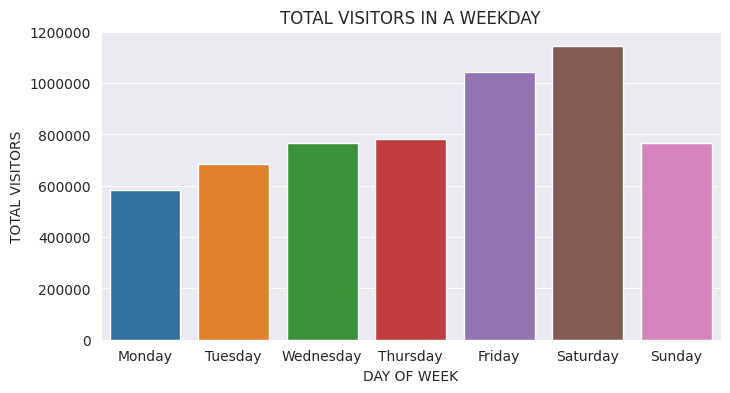

In [93]:
# plt.bar(total_visitors_weekday.WeekDay,total_visitors_weekday.visitors)
sns.barplot(total_visitors_weekday,x='WeekDay',y='visitors')
plt.title('TOTAL VISITORS IN A WEEKDAY')
plt.xlabel('DAY OF WEEK')
plt.ylabel('TOTAL VISITORS')
plt.ticklabel_format(style='plain', axis='y');

We can infer from the graph that Saturday has the maximum number of visitors,  while Friday has the second most number of visitors since most of the team parties happens on this day.  
Monday has the least number of visitors, since it is the day after weekend.Tuesday and Wednesday has fewer number of visitors.Let us look into the `date_info` dataframe to find the number of holidays in the dataset and explore it a bit.

In [94]:
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   visit_date   517 non-null    datetime64[ns]
 1   day_of_week  517 non-null    object        
 2   holiday_flg  517 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.2+ KB


In [95]:
total_visitors_DayOfMonth = train_data_copy.groupby(['DayOfWeek'],as_index=False)['visitors'].sum()
total_visitors_DayOfMonth = total_visitors_DayOfMonth.sort_values(by='visitors',ascending=False)

In [96]:
total_visitors_DayOfMonth

,DayOfWeek,visitors
21,22,212446
9,10,210185
17,18,205709
16,17,204632
20,21,201183
15,16,199610
14,15,197513
18,19,196128
10,11,195805
8,9,195796


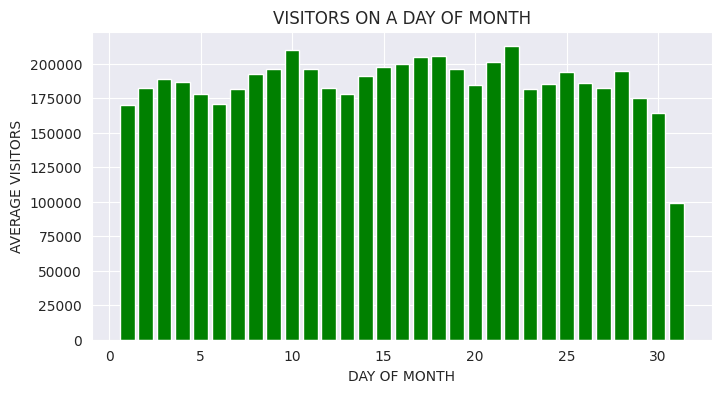

In [97]:
plt.bar(total_visitors_DayOfMonth.DayOfWeek,total_visitors_DayOfMonth.visitors,color='green')
plt.title('VISITORS ON A DAY OF MONTH')
plt.xlabel('DAY OF MONTH')
plt.ylabel('AVERAGE VISITORS')
plt.ticklabel_format(useOffset=False, style='plain');

The average number of visitors for a day of month is plotted above and we can infer that the vistors are the least on 30/31 since people are out of money by month ends.The average throughout the rest of the month are same and doesn't follow any particular pattern.

In [98]:
train_data_copy['visit_date']  =pd.to_datetime(train_data_copy['visit_date'])

data_hpg['visit_datetime']  =pd.to_datetime(data_hpg['visit_datetime'])
data_air['visit_datetime']  =pd.to_datetime(data_air['visit_datetime'])

data_hpg.rename(columns = {'reserve_visitors':'visitors','visit_datetime':'visit_date'}, inplace = True)
data_air.rename(columns = {'reserve_visitors':'visitors','visit_datetime':'visit_date'}, inplace = True)

train_data_copy['WeekDay']  =train_data_copy['visit_date'].dt.weekday
train_data_copy['DayOfWeek']  =train_data_copy['visit_date'].dt.day

In [99]:
total_visitors_hpg = data_hpg.groupby(['visit_date'],as_index=False)['visitors'].sum()
total_visitors_air = data_air.groupby(['visit_date'],as_index=False)['visitors'].sum()
total_visitors_airvisit = train_data_copy.groupby(['visit_date'],as_index=False)['visitors'].sum()

In [100]:
total_visitors_airvisit

,visit_date,visitors
0,2016-01-01,1056
1,2016-01-02,1931
2,2016-01-03,2479
3,2016-01-04,3462
4,2016-01-05,4013
...,...,...
512,2017-05-27,187
513,2017-05-28,109
514,2017-05-29,15
515,2017-05-30,8


In [101]:
total_visitors_hpg

,visit_date,visitors
0,2016-01-01 11:00:00,1
1,2016-01-01 13:00:00,3
2,2016-01-01 16:00:00,2
3,2016-01-01 17:00:00,112
4,2016-01-01 18:00:00,156
...,...,...
9842,2017-05-31 18:00:00,197
9843,2017-05-31 19:00:00,53
9844,2017-05-31 20:00:00,5
9845,2017-05-31 21:00:00,58


In [102]:
total_visitors_air

,visit_date,visitors
0,2016-01-01 19:00:00,10
1,2016-01-01 20:00:00,7
2,2016-01-02 01:00:00,6
3,2016-01-02 16:00:00,4
4,2016-01-02 17:00:00,77
...,...,...
4970,2017-05-29 12:00:00,9
4971,2017-05-29 18:00:00,6
4972,2017-05-30 23:00:00,8
4973,2017-05-31 20:00:00,13


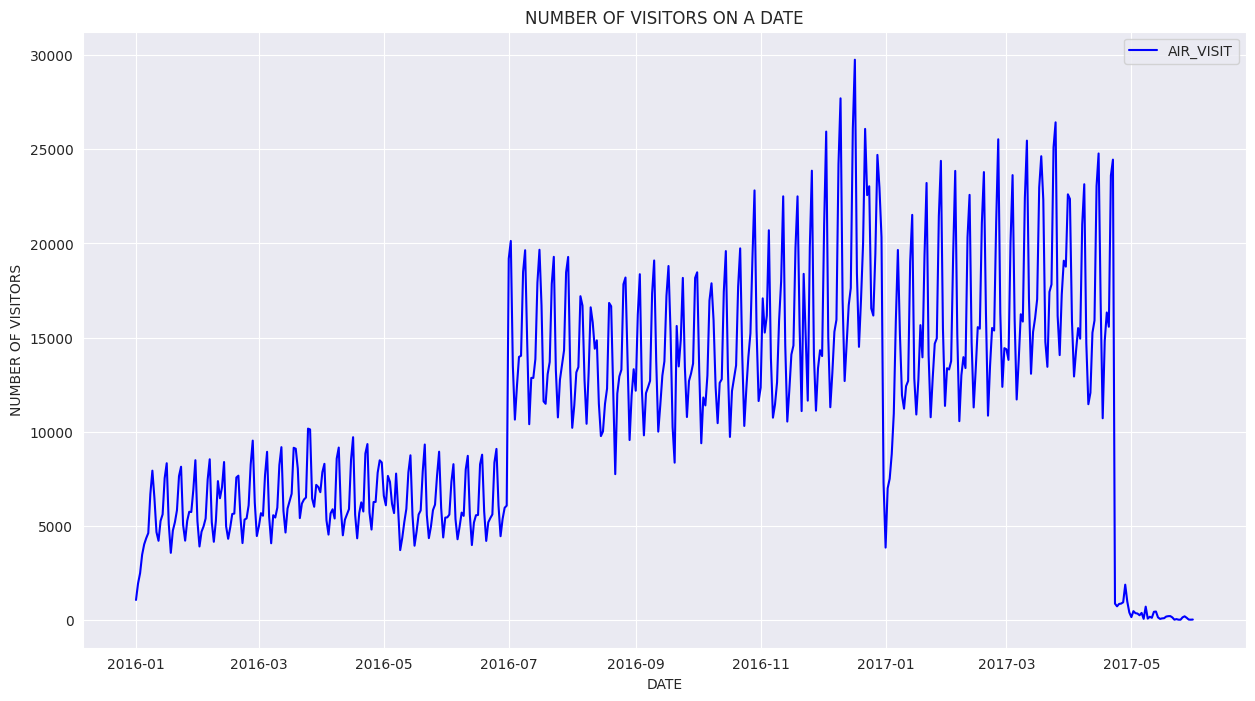

In [103]:
plt.figure(figsize=(15,8))
plt.rcParams["figure.autolayout"] = True
plt.plot(total_visitors_airvisit.visit_date,total_visitors_airvisit.visitors,color='blue',label='AIR_VISIT')
# plt.plot(total_visitors_hpg.visit_date,total_visitors_hpg.visitors,color='orange',label='HPG_RESERVATION')
# plt.plot(total_visitors_air.visit_date,total_visitors_air.visitors,color='red',label='AIR_RESERVATION')
plt.title('NUMBER OF VISITORS ON A DATE')
plt.xlabel('DATE')
plt.ylabel('NUMBER OF VISITORS')
plt.legend(['AIR_VISIT','HPG RESERVATION','AIR RESERVATION']);

There is a sudden spike in number of visitors probably in the month of July.
Probably many restaurants must have been registered at a time in the AirREGI.  There is steep slope in first week of January(most probably New year's day), .There is a sudden spike in number of visitors probably in first week of July month.No information is provided regarding the sudden spike and sudden dip in the trends.  

People might have wanted to spend and celebrate the day at homes or they might have travelled to other cities/country to celebrate, that might be the reason why less visitors are recorded on New year's day.

In [104]:
total_restaurants_by_area= data_air.groupby(['area_name'],as_index=False)['store_id'].count().rename(columns={'store_id':'store_count'})

In [105]:
total_restaurants_by_area.sort_values(by='store_count',ascending=False)

,area_name,store_count
52,Tōkyō-to Shibuya-ku Shibuya,6158
17,Hokkaidō Sapporo-shi Minami 3 Jōnishi,5728
10,Hiroshima-ken Hiroshima-shi Kokutaijimachi,5615
0,Fukuoka-ken Fukuoka-shi Daimyō,5233
29,Shizuoka-ken Hamamatsu-shi Motoshirochō,4938
...,...,...
24,Hyōgo-ken Takarazuka-shi Tōyōchō,1
22,Hyōgo-ken Kōbe-shi Motomachidōri,1
18,Hyōgo-ken Amagasaki-shi Higashinanamatsuchō,1
49,Tōkyō-to Setagaya-ku Okusawa,1


In [106]:
Average_restaurants_per_area = total_restaurants_by_area.store_count.mean()
Average_restaurants_per_area

1301.0985915492959

In [107]:
restaurant_by_genre = data_air.groupby(['genre_name'],as_index=False)['store_id'].count().rename(columns={'store_id':'store_count'})
restaurant_by_genre = restaurant_by_genre.sort_values(by = 'store_count',ascending = True)
restaurant_by_genre

,genre_name,store_count
0,Asian,2
5,International cuisine,3
9,Karaoke/Party,72
11,Other,679
1,Bar/Cocktail,910
3,Creative cuisine,1270
10,Okonomiyaki/Monja/Teppanyaki,2624
2,Cafe/Sweets,3862
12,Western food,4151
13,Yakiniku/Korean food,6946


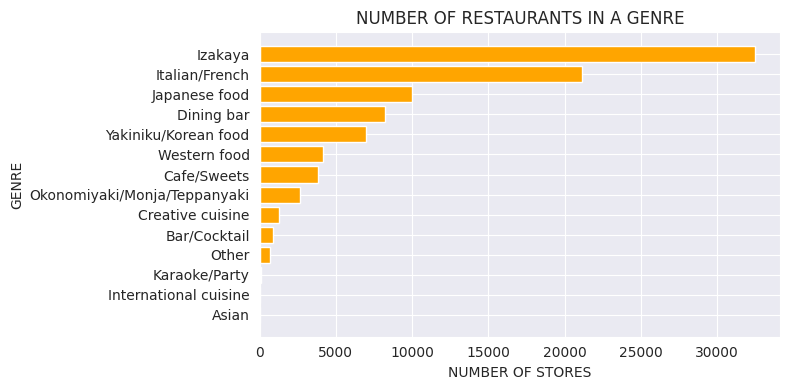

In [108]:
plt.barh(restaurant_by_genre['genre_name'],restaurant_by_genre['store_count'],color='orange')
plt.title('NUMBER OF RESTAURANTS IN A GENRE');
plt.ylabel('GENRE')
plt.xlabel('NUMBER OF STORES');

- Izakaya is the most popular type of restaurant in Japan while the Asian ,International cuisine,Karaoke/Party are the least preferred one.

- Japanese word izakaya means “pub” or “tavern”.

- Not all genres are present in AirREGI site, HPG site has many more genres that AirREGI.




In [109]:
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   visit_date   517 non-null    datetime64[ns]
 1   day_of_week  517 non-null    object        
 2   holiday_flg  517 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.2+ KB


In [110]:
day_count  = date_info.holiday_flg.value_counts()
day_count

0    482
1     35
Name: holiday_flg, dtype: int64

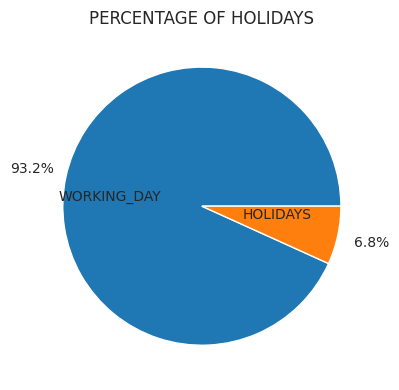

In [111]:
plt.title("PERCENTAGE OF HOLIDAYS")
plt.pie(day_count,labels=['WORKING_DAY','HOLIDAYS'],autopct='%1.1f%%',pctdistance=1.25, labeldistance=.3,);

Above is the pie chart representing the percentage holidays and working days in the dataset.Out of all the days in the dataset from 2016 to May 2017, 6.8% of the days are holidays.

In [112]:
timediff_hpg = data_hpg['visit_date'] - data_hpg['reserve_datetime']
timediff_air = data_air['visit_date'] - data_air['reserve_datetime']

In [113]:
timediff_hpg.median()

Timedelta('4 days 07:00:00')

In [114]:
timediff_air.median()

Timedelta('2 days 02:00:00')

There is an average time difference of 4 days between reserve time and visit time and the median time difference is 2 days.

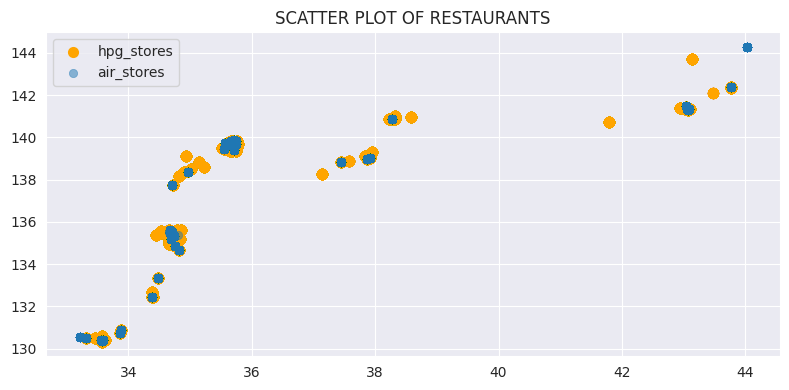

In [115]:
#plotting the store in map
plt.title("SCATTER PLOT OF RESTAURANTS")
plt.scatter(data_hpg.latitude,data_hpg.longitude,color='orange',linewidths=2)
plt.scatter(data_air.latitude,data_air.longitude,linewidths=0.5,alpha=0.5)
plt.legend(['hpg_stores','air_stores']);

The scatter plot provides approximate distribution of stores across the latitude and longitude.We can observe that not all stores are covered by any one reservation system.The hpg coveres the bulk of the stores across Japan.

In [116]:
location_info=train_data_copy.drop_duplicates(subset='store_id')
location_info.dropna(inplace=True)
location_info = location_info.reset_index(drop=True)

<ipython-input-116-19d7e728922d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_info.dropna(inplace=True)


In [117]:
location_info

,store_id,visit_date,genre_name,area_name,latitude,longitude,visitors,day_of_week,holiday_flg,Month,Day,WeekDay,Year,DayOfWeek
0,air_db80363d35f10926,2016-01-01,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,4,Friday,1,1,1,4,2016,1
1,air_08cb3c4ee6cd6a22,2016-01-01,Japanese style,Hyōgo-ken Kakogawa-shi Noguchichō Yoshino,34.752826,134.847642,2,Friday,1,1,1,4,2016,1
2,air_37189c92b6c761ec,2016-01-02,International cuisine,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Saturday,1,1,2,5,2016,2
3,air_c1ff20617c54fee7,2016-01-02,International cuisine,Tōkyō-to Minato-ku Takanawa,35.637183,139.737998,2,Saturday,1,1,2,5,2016,2
4,air_7420042ff75f9aca,2016-01-02,Okonomiyaki/Monja/Teppanyaki,Osaka Prefecture Osaka None,34.701519,135.498859,7,Saturday,1,1,2,5,2016,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,air_168441ada3e878e1,2016-07-01,Cafe/Sweets,Hyōgo-ken Kōbe-shi Sumiyoshi Higashimachi,34.720228,135.265455,24,Friday,0,7,1,4,2016,1
825,air_6c952e3c6e590945,2016-01-15,Yakiniku/Korean food,Miyagi-ken Sendai-shi Kamisugi,38.269076,140.870403,18,Friday,0,1,15,4,2016,15
826,air_0f2f96335f274801,2016-02-22,Izakaya,Tōkyō-to Chiyoda-ku Kanda Jinbōchō,35.695694,139.759386,2,Monday,0,2,22,0,2016,22
827,air_c7d30ab0e07f31d5,2016-03-24,Other,Tōkyō-to Taitō-ku Higashiueno,35.712607,139.779996,5,Thursday,0,3,24,3,2016,24


In [118]:
from folium import plugins
from folium.plugins import HeatMap


m = folium.Map(location=[43.768033 ,142.359664], tiles = 'cartodbpositron',zoom_start=13)

for i in range(1,len(location_info.latitude)):
     folium.Marker(location=[location_info.latitude[i],location_info.longitude[i]],
                   icon=folium.Icon(color='red',icon='location')).add_to(m)
m


The maximum number of stores are situated in the  Tokyo and Osaka .The map show that the longitude has more importance over the location than the latitude.

In [119]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Data Preprocessing

### Impute missing values

SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder.
It is implemented by the use of the SimpleImputer() method which takes the following arguments :

missing_values : The missing_values placeholder which has to be imputed. By default is NaN
strategy : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.
fill_value : The constant value to be given to the NaN data using the constant strategy.

In [120]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median')

In [121]:
imputer.fit(train_inputs)
imputer.fit(val_inputs)
imputer.fit(test_inputs)

SimpleImputer(strategy='median')

In [122]:
imputer.transform(train_inputs)
imputer.transform(val_inputs)
imputer.transform(test_inputs)

array([[  4.       ,  23.       ,   6.       ,  35.6940027, 139.7535951,
          0.       ],
       [  4.       ,  24.       ,   0.       ,  35.6940027, 139.7535951,
          0.       ],
       [  4.       ,  25.       ,   1.       ,  35.6940027, 139.7535951,
          0.       ],
       ...,
       [  5.       ,  29.       ,   0.       ,  35.7081457, 139.666288 ,
          0.       ],
       [  5.       ,  30.       ,   1.       ,  35.7081457, 139.666288 ,
          0.       ],
       [  5.       ,  31.       ,   2.       ,  35.7081457, 139.666288 ,
          0.       ]])

### Feature Scaling

We apply minmax scaler to our numeric cols .MinMaxScaler doesn’t reduce the effect of outliers, but it linearily scales them down into a fixed range, where the largest occuring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [124]:
scaler.fit(train_inputs[input_cols])
scaler.fit(val_inputs[input_cols])
scaler.fit(test_inputs[input_cols])

MinMaxScaler()

In [125]:
scaler.transform(train_inputs[input_cols])
scaler.transform(val_inputs[input_cols])
scaler.transform(test_inputs[input_cols])

array([[0.        , 0.73333333, 1.        , 0.22963386, 0.67894207,
        0.        ],
       [0.        , 0.76666667, 0.        , 0.22963386, 0.67894207,
        0.        ],
       [0.        , 0.8       , 0.16666667, 0.22963386, 0.67894207,
        0.        ],
       ...,
       [1.        , 0.93333333, 0.        , 0.23094234, 0.67274033,
        0.        ],
       [1.        , 0.96666667, 0.16666667, 0.23094234, 0.67274033,
        0.        ],
       [1.        , 1.        , 0.33333333, 0.23094234, 0.67274033,
        0.        ]])

### Encode categorical columns

Machine Learning models will accept only numerical values and hence the object data types need to be converted into numerical.


So far we've been using only numeric columns, since we can only perform computations with numbers.To use the categorical columns, we need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



We have three categorical column out of all the datasets . The primary_use column in the dataset is object type. There are different techniques to convert the string type columns into numerical. Since one hot encoding technique increases the no.of columns and tend to increase the size of the dataset, which inturn reduces the speed of computation. Hence in this notebook we are using `'LabelEncoder'` to convert strings to numericals.

In [126]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [127]:
label_genre = label.fit(train_data_split['genre_name'].unique())
label_area = label.fit(train_data_split['area_name'].unique())
label_store_id  = label.fit(train_data_split['store_id'].unique())

In [128]:
train_inputs['label_encoded_genre']=label_genre.fit_transform(train_data_split['genre_name'])
val_inputs['label_encoded_genre']=label_genre.fit_transform(val_data_split['genre_name'])
test_inputs['label_encoded_genre']=label_genre.fit_transform(test_data['genre_name'])
train_inputs['label_encoded_area']=label_area.fit_transform(train_data_split['area_name'])
val_inputs['label_encoded_area']=label_area.fit_transform(val_data_split['area_name'])
test_inputs['label_encoded_area']=label_area.fit_transform(test_data['area_name'])
train_inputs['label_encoded_store_id']=label_store_id.fit_transform(train_data_split['store_id'])
val_inputs['label_encoded_store_id']=label_store_id.fit_transform(val_data_split['store_id'])
test_inputs['label_encoded_store_id']=label_store_id.fit_transform(test_data['air_store_id'])

<ipython-input-128-11ba20f6d46c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs['label_encoded_genre']=label_genre.fit_transform(test_data['genre_name'])
<ipython-input-128-11ba20f6d46c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs['label_encoded_area']=label_area.fit_transform(test_data['area_name'])
<ipython-input-128-11ba20f6d46c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [129]:
#correlation matrix
train_inputs.corr()

,Month,Day,WeekDay,latitude,longitude,holiday_flg,label_encoded_genre,label_encoded_area,label_encoded_store_id
Month,1.000000,0.002235,0.002009,0.050786,0.018068,0.068707,0.002142,-0.005399,0.009437
Day,0.002235,1.000000,-0.003249,0.012591,-0.000860,0.075427,0.012953,-0.009233,-0.001835
WeekDay,0.002009,-0.003249,1.000000,0.019107,-0.007582,-0.026966,0.000371,-0.017899,0.005502
latitude,0.050786,0.012591,0.019107,1.000000,0.655937,0.015011,0.136230,-0.025270,0.015365
longitude,0.018068,-0.000860,-0.007582,0.655937,1.000000,-0.007094,0.066449,0.558684,0.005433
holiday_flg,0.068707,0.075427,-0.026966,0.015011,-0.007094,1.000000,0.003780,-0.014564,0.001522
label_encoded_genre,0.002142,0.012953,0.000371,0.136230,0.066449,0.003780,1.000000,-0.074748,-0.071494
label_encoded_area,-0.005399,-0.009233,-0.017899,-0.025270,0.558684,-0.014564,-0.074748,1.000000,-0.053562
label_encoded_store_id,0.009437,-0.001835,0.005502,0.015365,0.005433,0.001522,-0.071494,-0.053562,1.000000


In [130]:
train_data_split.Year.unique()

array([2016])

In [131]:
from sklearn.preprocessing import OneHotEncoder

In [132]:
categorical_cols = ['genre_name']

In [133]:
train_data_split

,store_id,visit_date,genre_name,area_name,latitude,longitude,visitors,day_of_week,holiday_flg,Month,Day,WeekDay,Year
0,air_db80363d35f10926,2016-01-01,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,4,Friday,1,1,1,4,2016
1,air_db80363d35f10926,2016-01-02,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Saturday,1,1,2,5,2016
2,air_db80363d35f10926,2016-01-03,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,6,Sunday,1,1,3,6,2016
3,air_db80363d35f10926,2016-01-06,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,3,Wednesday,0,1,6,2,2016
4,air_db80363d35f10926,2016-01-11,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Monday,1,1,11,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229186,air_24e8414b9b07decb,2016-12-26,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,7,Monday,0,12,26,0,2016
229187,air_24e8414b9b07decb,2016-12-27,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,6,Tuesday,0,12,27,1,2016
229188,air_24e8414b9b07decb,2016-12-28,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,8,Wednesday,0,12,28,2,2016
229189,air_24e8414b9b07decb,2016-12-29,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,2,Thursday,1,12,29,3,2016


In [134]:
# encoder=OneHotEncoder(sparse=False, handle_unknown='ignore')
# encoder.fit(train_data_split[categorical_cols])

In [135]:
# encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
# encoded_cols

In [136]:
# train_inputs[encoded_cols]=encoder.transform(train_data_split[categorical_cols])
# val_inputs[encoded_cols]=encoder.transform(val_data_split[categorical_cols])
# #test_inputs[encoded_cols]=encoder.transform(val_data_split[categorical_cols])

In [137]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Train & Evaluate different models

In this section we are going to train linear regression, decision trees, random forest. And also going to tune hyperparameters for decision trees, random forest for better performance.

#### Baseline model - Linear Regression

Here we are finding the average number of visitors on weekdays and left joining it on weekdays that we have derived in submission by feature engineering.

In [138]:
from sklearn.metrics import mean_squared_log_error

In [139]:
Recruit_WeekDayMean_submission = sample_submission.copy(deep=True)

In [140]:
train_data_split

,store_id,visit_date,genre_name,area_name,latitude,longitude,visitors,day_of_week,holiday_flg,Month,Day,WeekDay,Year
0,air_db80363d35f10926,2016-01-01,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,4,Friday,1,1,1,4,2016
1,air_db80363d35f10926,2016-01-02,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Saturday,1,1,2,5,2016
2,air_db80363d35f10926,2016-01-03,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,6,Sunday,1,1,3,6,2016
3,air_db80363d35f10926,2016-01-06,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,3,Wednesday,0,1,6,2,2016
4,air_db80363d35f10926,2016-01-11,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Monday,1,1,11,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229186,air_24e8414b9b07decb,2016-12-26,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,7,Monday,0,12,26,0,2016
229187,air_24e8414b9b07decb,2016-12-27,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,6,Tuesday,0,12,27,1,2016
229188,air_24e8414b9b07decb,2016-12-28,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,8,Wednesday,0,12,28,2,2016
229189,air_24e8414b9b07decb,2016-12-29,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,2,Thursday,1,12,29,3,2016


In [141]:
mean_weekday =train_data_split.groupby(['WeekDay'],as_index=False)['visitors'].mean()
mean_weekday

,WeekDay,visitors
0,0,15.068699
1,1,15.269302
2,2,16.251513
3,3,16.032928
4,4,17.655098
5,5,19.142232
6,6,19.593738


In [142]:
train_data_split

,store_id,visit_date,genre_name,area_name,latitude,longitude,visitors,day_of_week,holiday_flg,Month,Day,WeekDay,Year
0,air_db80363d35f10926,2016-01-01,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,4,Friday,1,1,1,4,2016
1,air_db80363d35f10926,2016-01-02,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Saturday,1,1,2,5,2016
2,air_db80363d35f10926,2016-01-03,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,6,Sunday,1,1,3,6,2016
3,air_db80363d35f10926,2016-01-06,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,3,Wednesday,0,1,6,2,2016
4,air_db80363d35f10926,2016-01-11,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Monday,1,1,11,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229186,air_24e8414b9b07decb,2016-12-26,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,7,Monday,0,12,26,0,2016
229187,air_24e8414b9b07decb,2016-12-27,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,6,Tuesday,0,12,27,1,2016
229188,air_24e8414b9b07decb,2016-12-28,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,8,Wednesday,0,12,28,2,2016
229189,air_24e8414b9b07decb,2016-12-29,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,2,Thursday,1,12,29,3,2016


In [143]:
train_data_split  = pd.merge(train_data_split,mean_weekday,on='WeekDay',how= 'left')
train_data_split

,store_id,visit_date,genre_name,area_name,latitude,longitude,visitors_x,day_of_week,holiday_flg,Month,Day,WeekDay,Year,visitors_y
0,air_db80363d35f10926,2016-01-01,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,4,Friday,1,1,1,4,2016,17.655098
1,air_db80363d35f10926,2016-01-02,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Saturday,1,1,2,5,2016,19.142232
2,air_db80363d35f10926,2016-01-03,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,6,Sunday,1,1,3,6,2016,19.593738
3,air_db80363d35f10926,2016-01-06,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,3,Wednesday,0,1,6,2,2016,16.251513
4,air_db80363d35f10926,2016-01-11,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,2,Monday,1,1,11,0,2016,15.068699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229186,air_24e8414b9b07decb,2016-12-26,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,7,Monday,0,12,26,0,2016,15.068699
229187,air_24e8414b9b07decb,2016-12-27,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,6,Tuesday,0,12,27,1,2016,15.269302
229188,air_24e8414b9b07decb,2016-12-28,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,8,Wednesday,0,12,28,2,2016,16.251513
229189,air_24e8414b9b07decb,2016-12-29,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,2,Thursday,1,12,29,3,2016,16.032928


In [144]:
rmsle_mean = mean_squared_log_error(train_targets,train_data_split.visitors_y,squared=False)
rmsle_mean

1.0072233742409074

The RMSLE error for the base model is `1.0072233742409074`.

In [145]:
Recruit_WeekDayMean_submission = pd.merge(sample_submission,mean_weekday,on='WeekDay',how= 'left')

In [146]:
Recruit_WeekDayMean_submission = Recruit_WeekDayMean_submission.drop(['air_store_id','visit_date','WeekDay'],axis=1)
Recruit_WeekDayMean_submission

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,19.593738
1,air_00a91d42b08b08d9_2017-04-24,15.068699
2,air_00a91d42b08b08d9_2017-04-25,15.269302
3,air_00a91d42b08b08d9_2017-04-26,16.251513
4,air_00a91d42b08b08d9_2017-04-27,16.032928
...,...,...
32014,air_fff68b929994bfbd_2017-05-27,19.142232
32015,air_fff68b929994bfbd_2017-05-28,19.593738
32016,air_fff68b929994bfbd_2017-05-29,15.068699
32017,air_fff68b929994bfbd_2017-05-30,15.269302


In [147]:
#Recruit_WeekDayMean_submission.to_csv('/content/recruit-restaurant-visitor-forecasting/Recruit_weekdaymean_submission.csv',index=False)

![Recruit_submission_2](https://i.imgur.com/9wKYROG.png)

After kaggle submission the base model gave a score of `0.82022` and now we have to find a machine learing model that can give a better result than our base model.

#### Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).

In [148]:
train_inputs

,Month,Day,WeekDay,latitude,longitude,holiday_flg,label_encoded_genre,label_encoded_area,label_encoded_store_id
0,1,1,4,43.768033,142.359664,1,23,24,706
1,1,2,5,43.768033,142.359664,1,23,24,706
2,1,3,6,43.768033,142.359664,1,23,24,706
3,1,6,2,43.768033,142.359664,0,23,24,706
4,1,11,0,43.768033,142.359664,1,23,24,706
...,...,...,...,...,...,...,...,...,...
229186,12,26,0,35.653217,139.711036,0,21,95,98
229187,12,27,1,35.653217,139.711036,0,21,95,98
229188,12,28,2,35.653217,139.711036,0,21,95,98
229189,12,29,3,35.653217,139.711036,1,21,95,98


In [149]:
test_inputs_linReg = test_inputs.copy(deep=True)

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
%%time
model_LinReg = LinearRegression()

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 21.9 µs


In [152]:
model_LinReg.fit(train_inputs,train_targets)

LinearRegression()

In [153]:
LinReg_pred_train = model_LinReg.predict(train_inputs)
LinReg_pred_train

array([[14.74235303],
       [15.5786592 ],
       [16.41496538],
       ...,
       [14.17798829],
       [15.8477632 ],
       [16.68406937]])

In [154]:
rmsle_LinReg_train  = mean_squared_log_error(LinReg_pred_train,train_targets)
rmsle_LinReg_train

0.9930287015370269

In [155]:
LinReg_pred_val = model_LinReg.predict(val_inputs)
LinReg_pred_val

array([[11.34989614],
       [11.34989614],
       [11.34989614],
       ...,
       [16.41989357],
       [17.25619974],
       [18.09250591]])

In [156]:
rmsle_LinReg_val = mean_squared_log_error(LinReg_pred_val,val_targets)
rmsle_LinReg_val

1.3012715107839452

In [157]:
LinReg_pred_test = model_LinReg.predict(test_inputs_linReg)
LinReg_pred_test

array([[20.67076879],
       [15.58329087],
       [16.41959705],
       ...,
       [17.03311068],
       [17.86941686],
       [18.70572303]])

In [158]:
lin_Reg_submission = sample_submission.copy(deep=True)

In [159]:
lin_Reg_submission['visitors'] = LinReg_pred_test
lin_Reg_submission.drop(['air_store_id','visit_date','WeekDay'],axis=1,inplace=True)
lin_Reg_submission

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,20.670769
1,air_00a91d42b08b08d9_2017-04-24,15.583291
2,air_00a91d42b08b08d9_2017-04-25,16.419597
3,air_00a91d42b08b08d9_2017-04-26,17.255903
4,air_00a91d42b08b08d9_2017-04-27,18.092209
...,...,...
32014,air_fff68b929994bfbd_2017-05-27,21.284282
32015,air_fff68b929994bfbd_2017-05-28,22.120589
32016,air_fff68b929994bfbd_2017-05-29,17.033111
32017,air_fff68b929994bfbd_2017-05-30,17.869417


Linear regression performs slightly better than the base model that predicts weekday mean across all the values .

In [160]:
#lin_Reg_submission.to_csv('/content/recruit-restaurant-visitor-forecasting/Recruit_linearegression_submission.csv',index=False)

Let's define a helper function `test_params` which can test the given value of one or more hyperparameters.

In [161]:
#function o try different models
def try_model(model,**params):
  model.fit(train_inputs,train_targets)
  train_pred = model.predict(train_inputs)
  val_pred = model.predict(val_inputs)
  rmsle_train = mean_squared_log_error(train_pred,train_targets,squared=False)
  rmsle_val = mean_squared_log_error(val_pred,val_targets,squared=False)
  return rmsle_train,rmsle_val


Trying the above function on different regression models.

In [162]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [163]:
try_model(LinearRegression())

(0.9965082546256337, 1.1407328831869208)

In [164]:
try_model(Ridge())

(0.9965082443215324, 1.140732881184751)

In [165]:
try_model(Lasso())

(0.9985082457527213, 1.1296813795814438)

In [166]:
try_model(ElasticNet())

(0.9975427267902098, 1.1346415737336555)

Linear Regression performs slightly well on our train data when compared to base model.Let us try some tree based models and see if we can get some improved results.

#### Decision Tree

A decision tree is a flowchart-like tree structure where each internal node denotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm. It is a versatile supervised machine-learning algorithm, which is used for both classification and regression problems. It is one of the very powerful algorithms. And it is also used in Random Forest to train on different subsets of training data, which makes random forest one of the most powerful algorithms in machine learning.

In [167]:
from sklearn.tree import DecisionTreeRegressor

In [168]:
try_model(DecisionTreeRegressor(),random_state=42)

(0.4477960198058353, 1.1826176765175047)

Decision tree performs much better than linear models.

In [169]:
%%time
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(train_inputs,train_targets)

CPU times: user 1.28 s, sys: 5.21 ms, total: 1.28 s
Wall time: 1.29 s


DecisionTreeRegressor(random_state=42)

In [170]:
tree_importances = model_dt.feature_importances_
tree_importances

array([0.10707136, 0.20088048, 0.09793807, 0.07383667, 0.06754477,
       0.01551401, 0.07715894, 0.07257606, 0.28747964])

In [171]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

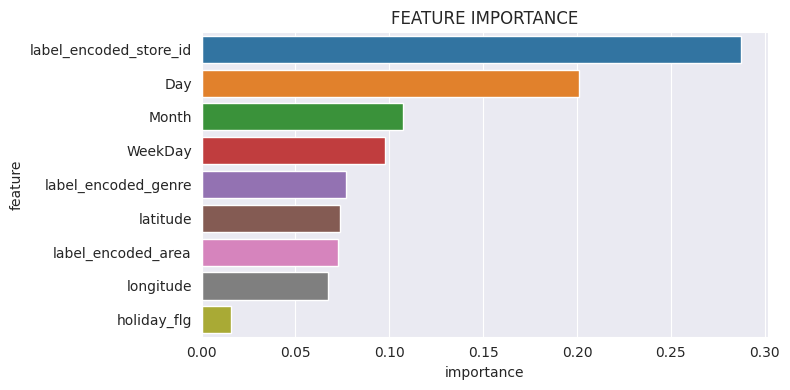

In [172]:
plt.title('FEATURE IMPORTANCE')
sns.barplot(tree_importance_df,x='importance',y='feature',orient='h');

In [173]:
train_inputs

,Month,Day,WeekDay,latitude,longitude,holiday_flg,label_encoded_genre,label_encoded_area,label_encoded_store_id
0,1,1,4,43.768033,142.359664,1,23,24,706
1,1,2,5,43.768033,142.359664,1,23,24,706
2,1,3,6,43.768033,142.359664,1,23,24,706
3,1,6,2,43.768033,142.359664,0,23,24,706
4,1,11,0,43.768033,142.359664,1,23,24,706
...,...,...,...,...,...,...,...,...,...
229186,12,26,0,35.653217,139.711036,0,21,95,98
229187,12,27,1,35.653217,139.711036,0,21,95,98
229188,12,28,2,35.653217,139.711036,0,21,95,98
229189,12,29,3,35.653217,139.711036,1,21,95,98


#### Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
%%time
model_rf = RandomForestRegressor()

CPU times: user 80 µs, sys: 7 µs, total: 87 µs
Wall time: 92.7 µs


In [176]:
model_rf.fit(train_inputs,train_targets)

<ipython-input-176-86ca823e05e4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(train_inputs,train_targets)


RandomForestRegressor()

In [177]:
rf_train_preds = model_rf.predict(train_inputs)

In [178]:
rf_train_rmsle = mean_squared_log_error(rf_train_preds,train_targets)
rf_train_rmsle

0.25387662411389

In [179]:
rf_val_preds = model_rf.predict(val_inputs)
rf_val_preds

array([ 4.74497619,  4.74497619,  4.74497619, ..., 25.11035714,
       20.49547078, 19.31712698])

In [180]:
rf_val_rmsle = mean_squared_log_error(rf_val_preds,val_targets)
rf_val_rmsle

1.1382142567351081

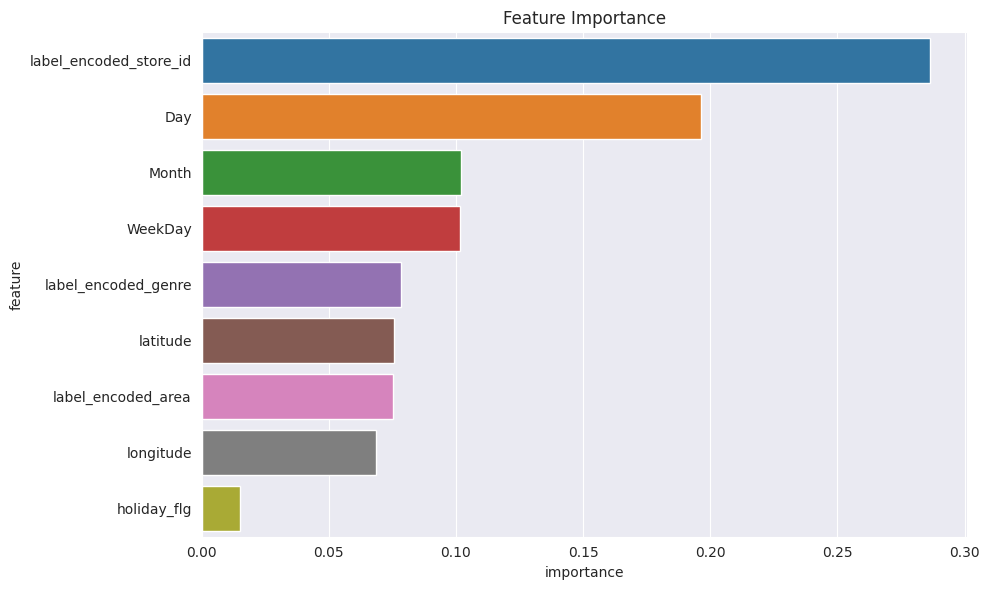

In [242]:
#creating a dataframe to study the importance of each metric
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

#### Gradient Boosting

In [182]:
from xgboost import XGBRegressor

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

* The average value of the target column and uses as an initial prediction every input.  
* The residuals (difference) of the predictions with the targets are computed.
* A decision tree of limited depth is trained to predict just the residuals for each input.  
* Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)  
* Scaled predictions for the tree are added to the previous predictions to obtain the new and improved predictions.    
* Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.  
    The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model.

In [183]:
%%time
model_xb = XGBRegressor(random_state=42, n_jobs=-1)

CPU times: user 61 µs, sys: 2 µs, total: 63 µs
Wall time: 68.9 µs


In [184]:
model_xb.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [185]:
train_inputs

,Month,Day,WeekDay,latitude,longitude,holiday_flg,label_encoded_genre,label_encoded_area,label_encoded_store_id
0,1,1,4,43.768033,142.359664,1,23,24,706
1,1,2,5,43.768033,142.359664,1,23,24,706
2,1,3,6,43.768033,142.359664,1,23,24,706
3,1,6,2,43.768033,142.359664,0,23,24,706
4,1,11,0,43.768033,142.359664,1,23,24,706
...,...,...,...,...,...,...,...,...,...
229186,12,26,0,35.653217,139.711036,0,21,95,98
229187,12,27,1,35.653217,139.711036,0,21,95,98
229188,12,28,2,35.653217,139.711036,0,21,95,98
229189,12,29,3,35.653217,139.711036,1,21,95,98


In [186]:
xgb_train_preds = model_xb.predict(train_inputs)
xgb_train_preds

array([4.2783804, 1.2993373, 5.9378514, ..., 8.421934 , 6.936022 ,
       6.4570923], dtype=float32)

In [187]:
xgb_train_preds = xgb_train_preds.clip(min=0)
xgb_train_preds

array([4.2783804, 1.2993373, 5.9378514, ..., 8.421934 , 6.936022 ,
       6.4570923], dtype=float32)

In [188]:
xb_train_rmsle =  mean_squared_log_error(xgb_train_preds,train_targets)
xb_train_rmsle

0.5590419878546803

In [189]:
xgb_val_preds = model_xb.predict(val_inputs)
xgb_val_preds

array([4.9963913, 4.9963913, 4.9963913, ..., 7.12565  , 7.657617 ,
       3.7067618], dtype=float32)

In [190]:
xgb_val_preds = xgb_val_preds.clip(min=0)
xgb_val_preds

array([4.9963913, 4.9963913, 4.9963913, ..., 7.12565  , 7.657617 ,
       3.7067618], dtype=float32)

In [191]:
xb_val_rmsle =  mean_squared_log_error(xgb_val_preds,val_targets)
xb_val_rmsle

1.0210091166171718

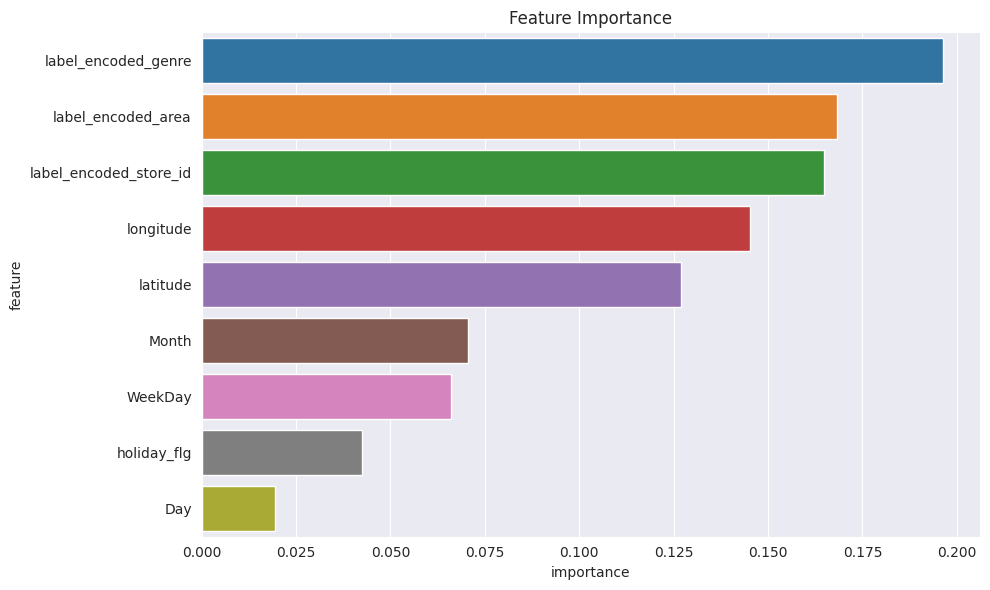

In [241]:
#creating a dataframe to study the importance of each metric
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_xb.feature_importances_
}).sort_values('importance', ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Tree based ensemble model Random Forest and Gradient Boosting method with XGBoost gives good prediction over validation data in compared to training data.label_encoded_genre,label_encoded_area,label_encoded_store_id are given more importance.Hence we have good validation score.

#### Hyperparameter tuning for RandomForest model  


Let us now tune the hyperparameters of our model. You can find the hyperparameters for  `RandomForestRegressor` here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html ,  
`XGB Regressor` here: https://xgboost.readthedocs.io/en/stable/parameter.html


<img src="https://i.imgur.com/EJCrSZw.png" width="480">


At some point our model starts  memorizing all training examples, leading to a 100% training accuracy, while the validation accuracy was is marginally better than a baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting.

The model accepts several arguments, some of which can be modified to reduce overfitting.This is called hyperparameter tuning .We plot graph with the following funvtion to obtain the point where the eventhough the training loss decreases the validation loss start to increase and this starting point is the optimum point for the hyperparameter of our model.

Let's also define a helper function to test and plot different values of a single parameter.

In [200]:
# function for randomforest params
def test_params(model,**params):
    if model == RandomForestRegressor :
      model = RandomForestRegressor(random_state=42, n_jobs=-1,**params).fit(train_inputs, train_targets)
    if model == XGBRegressor :
      model = XGBRegressor(random_state=42, n_jobs=-1,**params).fit(train_inputs, train_targets)
    train_rmsle = mean_squared_log_error(model.predict(train_inputs).clip(min=0), train_targets, squared=False)
    val_rmsle = mean_squared_log_error(model.predict(val_inputs).clip(min=0), val_targets, squared=False)
    return train_rmsle, val_rmsle
def test_param_and_plot(model,param_name, param_values):
    train_errors, val_errors = [], []
    for value in param_values:
        params = {param_name: value}
        train_rmsle, val_rmsle = test_params(model,**params)
        train_errors.append(train_rmsle)
        val_errors.append(val_rmsle)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSLE')
    plt.legend(['Training', 'Validation'])

Let us tune the hyperparameters to obtain a model with reduced rmsle losses on some of the important features .

In [201]:
#before tuning
rf_train_rmsle,rf_val_rmsle

(0.25387662411389, 1.1382142567351081)

<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1,**params).fit(train_inputs, train_targets)
<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1,**params).fit(train_inputs, train_targets)
<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1,**params).fit(train_inputs, train_targets)
<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

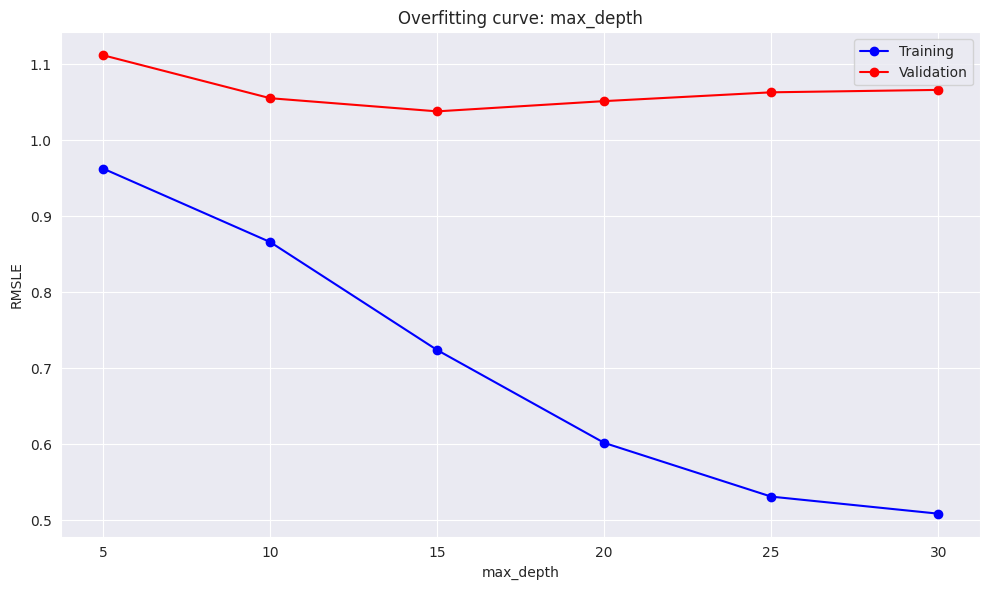

In [202]:
test_param_and_plot(RandomForestRegressor,'max_depth', [5, 10, 15, 20, 25, 30]);

In [203]:
#test_params(RandomForestRegressor,max_depth=10)

In [204]:
#test_params(RandomForestRegressor,max_depth=12)

In [205]:
#test_params(RandomForestRegressor,max_depth=14)

In [206]:
#test_params(RandomForestRegressor,max_depth=15)

In [207]:
#test_params(RandomForestRegressor,max_depth=16)

When `max_depth=15` the trainig error reduce while the validation error start to increase hence we take this point as the optimum value.

<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1,**params).fit(train_inputs, train_targets)
<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1,**params).fit(train_inputs, train_targets)
<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1,**params).fit(train_inputs, train_targets)
<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

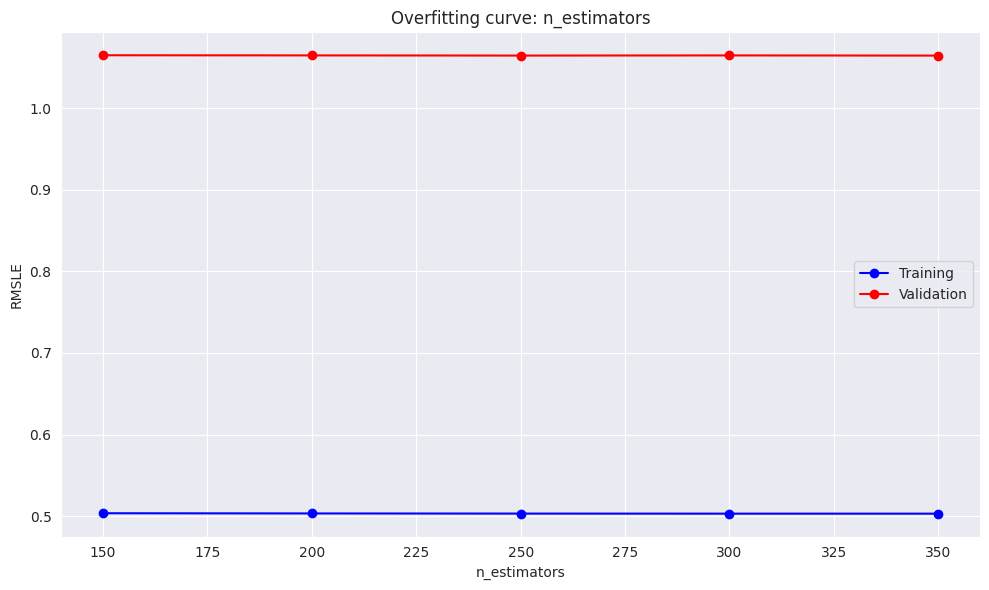

In [208]:
test_param_and_plot(RandomForestRegressor,'n_estimators', [150, 200, 250, 300, 350])

In [209]:
#test_params(RandomForestRegressor,n_estimators=150)

In [210]:
#test_params(RandomForestRegressor,n_estimators=200)

In [211]:
#test_params(RandomForestRegressor,n_estimators=250)

In [212]:
#test_params(RandomForestRegressor,n_estimators=300)

n_estimators doesn't  impact on rmsle losses in a high scale.We look for more hyperparameters.

<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1,**params).fit(train_inputs, train_targets)
<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1,**params).fit(train_inputs, train_targets)
<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1,**params).fit(train_inputs, train_targets)
<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

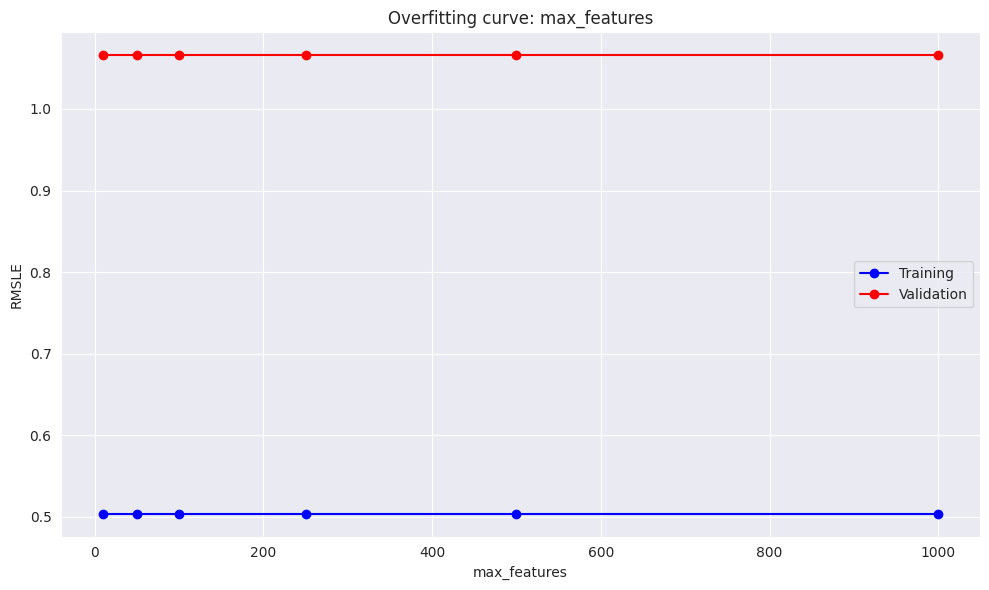

In [213]:
test_param_and_plot(RandomForestRegressor,'max_features', [10,50,100, 250, 500,1000])

In [214]:
#test_params(RandomForestRegressor,max_features='sqrt')

In [215]:
#test_params(RandomForestRegressor,max_features='log2')

In [216]:
#est_params(RandomForestRegressor,max_features=120)

In [217]:
#test_params(RandomForestRegressor,max_features=140)

In [218]:
#test_params(RandomForestRegressor,max_features=200)

Training random forest regressor model with your best hyperparameters to minimize the validation loss

In [219]:
test_params(RandomForestRegressor,max_depth=15,max_features='log2')

<ipython-input-200-72f34b84b36e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=42, n_jobs=-1,**params).fit(train_inputs, train_targets)


(0.7658897052308788, 1.0391860167044342)

#### Hyperparameter tuning for XGBoost model

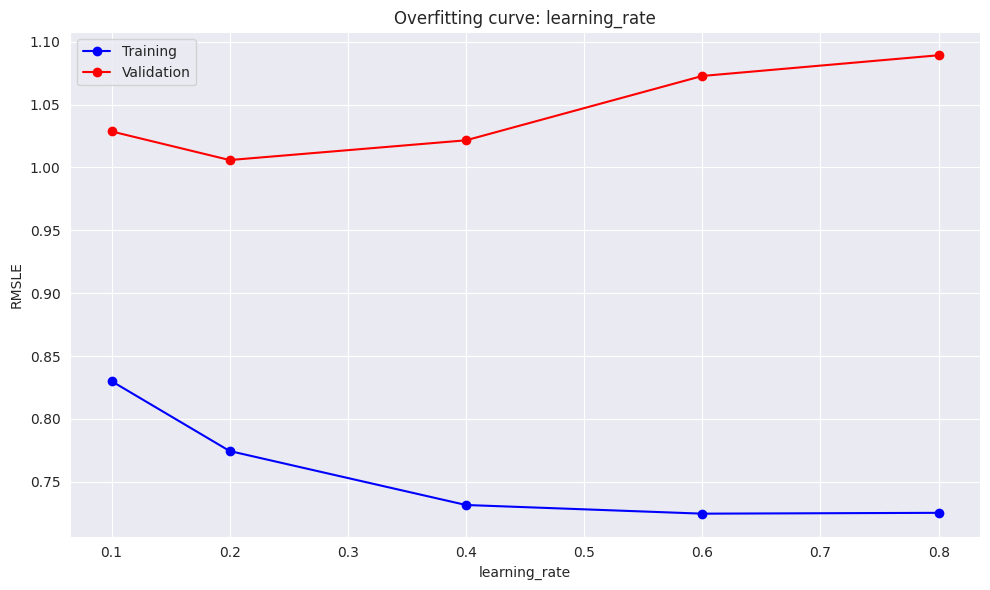

In [220]:
test_param_and_plot(XGBRegressor,'learning_rate', [0.1, 0.2, 0.4, 0.6,0.8])

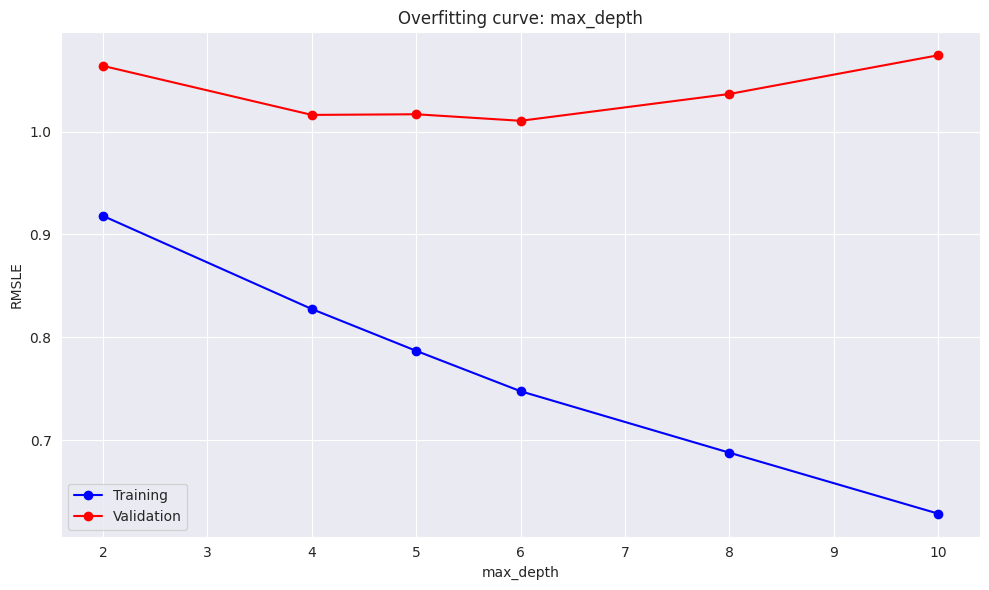

In [221]:
test_param_and_plot(XGBRegressor,'max_depth', [2,4,5,6,8,10])

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:07:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:07:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:07:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.



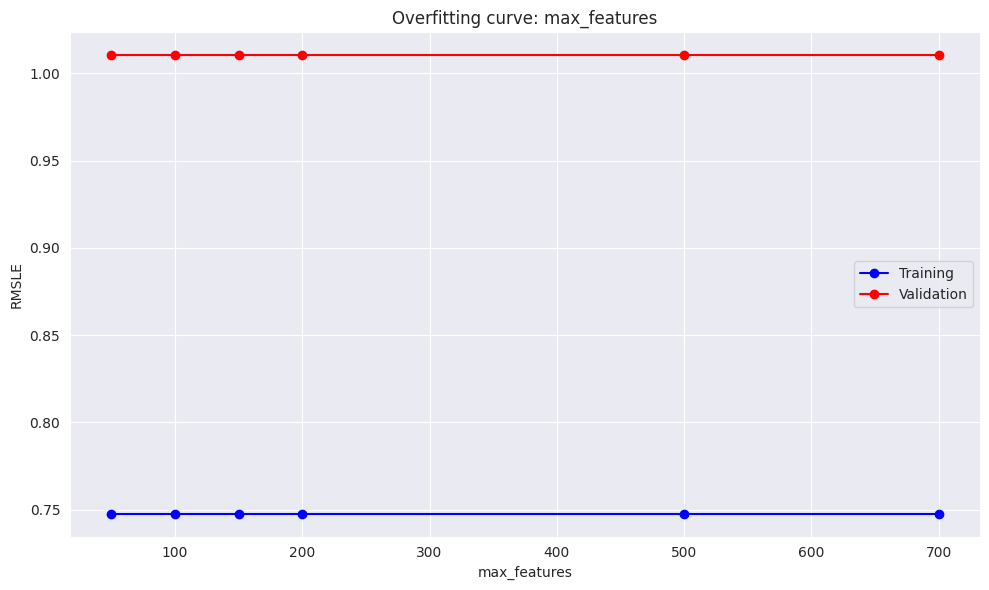

In [222]:
test_param_and_plot(XGBRegressor,'max_features', [50, 100, 150, 200, 500, 700])

In [223]:
#test_params(XGBRegressor,max_features='log2')

In [224]:
##test_params(XGBRegressor,max_features=120)

In [225]:
#test_params(XGBRegressor,max_features=200)

In [226]:
#test_params(XGBRegressor,max_features=700)

Training random decision tree model with your best hyperparameters to minimize the validation loss

In [227]:
test_params(XGBRegressor,learning_rate=0.2, max_depth=10)

(0.650281691944652, 1.0457661758169228)

## Training the Best Model

Random Forest and XG Boost gives the best result with test data in Kaggle submission.Let us create the model with the best parameters for predicitng the number of visitors for the Recruit restaurant datasets and make submission to Kaggle.

In [228]:
rf_model = RandomForestRegressor(random_state=42,max_depth = 10,max_features = 'log2',n_jobs=-1)
xb_model = XGBRegressor(random_state=42,learning_rate=0.2, max_depth=10,n_jobs=-1)

In [229]:
rf_model.fit(train_inputs,train_targets)
xb_model.fit(train_inputs,train_targets)

<ipython-input-229-0a3b3b1bcbf8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(train_inputs,train_targets)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [230]:
rf_train_pred = rf_model.predict(train_inputs)
xb_train_pred = xb_model.predict(train_inputs)
xb_train_pred = xb_train_pred.clip(min=0)

In [231]:
rf_train_rmsle = mean_squared_log_error(train_targets,rf_train_pred,squared = False)
xb_train_rmsle = mean_squared_log_error(train_targets,xb_train_pred,squared = False)
rf_train_rmsle,xb_train_rmsle

(0.8892325132767722, 0.650281691944652)

In [232]:
rf_val_pred = rf_model.predict(val_inputs)
xb_val_pred = xb_model.predict(val_inputs)
xb_val_pred = xb_val_pred.clip(min=0)

In [233]:
rf_val_rmsle = mean_squared_log_error(val_targets,rf_val_pred,squared = False)
xb_val_rmsle = mean_squared_log_error(val_targets,xb_val_pred,squared = False)
rf_val_rmsle,xb_val_rmsle

(1.0702873575459755, 1.0457661758169228)

In [234]:
rf_test_pred=rf_model.predict(test_inputs)
xb_test_pred=xb_model.predict(test_inputs)
xb_test_pred = xb_test_pred.clip(min=0)

In [235]:
rf_submission = sample_submission.copy(deep=True)
xb_submission = sample_submission.copy(deep=True)

In [236]:
rf_submission['visitors'] = rf_test_pred
rf_submission.drop(['air_store_id','visit_date','WeekDay'],axis=1,inplace=True)
rf_submission

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,21.248670
1,air_00a91d42b08b08d9_2017-04-24,17.600796
2,air_00a91d42b08b08d9_2017-04-25,17.870568
3,air_00a91d42b08b08d9_2017-04-26,17.815500
4,air_00a91d42b08b08d9_2017-04-27,17.895667
...,...,...
32014,air_fff68b929994bfbd_2017-05-27,23.770277
32015,air_fff68b929994bfbd_2017-05-28,24.822782
32016,air_fff68b929994bfbd_2017-05-29,22.413306
32017,air_fff68b929994bfbd_2017-05-30,21.822005


![Recruit_Submission4](https://i.imgur.com/F6fTRuv.png)

In [237]:
#rf_submission.to_csv('/content/recruit-restaurant-visitor-forecasting/Recruit_randomforest_submission.csv',index=False)

In [238]:
xb_submission['visitors'] = xb_test_pred
xb_submission.drop(['air_store_id','visit_date','WeekDay'],axis=1,inplace=True)
xb_submission

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,3.450806
1,air_00a91d42b08b08d9_2017-04-24,25.741795
2,air_00a91d42b08b08d9_2017-04-25,18.628531
3,air_00a91d42b08b08d9_2017-04-26,25.635666
4,air_00a91d42b08b08d9_2017-04-27,27.738733
...,...,...
32014,air_fff68b929994bfbd_2017-05-27,0.000000
32015,air_fff68b929994bfbd_2017-05-28,0.000000
32016,air_fff68b929994bfbd_2017-05-29,3.709364
32017,air_fff68b929994bfbd_2017-05-30,1.767840


In [239]:
#xb_submission.to_csv('/content/recruit-restaurant-visitor-forecasting/Recruit_xgboost_submission.csv',index=False)

![Submission_4](https://i.imgur.com/PsYAS3N.png)

Both the models performs well with the test data and final model  submitted has a Kaggle rank of around 2034 for the test set in the time series forecasting problem.

## Summary

Lets summarise the steps we have done through the project:

* This is a supervised machine learning  Regression problem .
* Downloaded the datasets from Kaggle .
* Explored the datasets with visualizations  
* Filled missing values  
* Encoded categorical variables.  
* Fitted various models to test best accuracies on test and validation sets
* The evaluation metrics used is RMSLE.  
* Tuned hyperparameters on Random Forest,Decision Trees for best performance   and model to be free from overfitting.
* Made the predictions on test dataset.    
* Saved the predictions to the submission dataset.  
* Exported the predictions on submission.csv file  
* This csv file is downloaded and submitted to Kaggle.  

In [240]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=[ "Model", "HyperParameter1","HyperParameter2", "RMSLE(TRAIN)"]
x.add_row(["Base Model", "-","-","1.007223374"])
x.add_row(["LinearRegressor", "-","-", "0.9965082546"])
x.add_row(["DecisionTreeRegressor", "-","-", "0.4477960198058353"])
x.add_row(["RandomForestRegressor", "max_depth = 10","max_features = 'log2'", "0.8892325132767722"])
x.add_row(["XGBRegressor", "learning_rate=0.2","max_depth=10", "0.650281691944652"])

print(x)

+-----------------------+-------------------+-----------------------+--------------------+
|         Model         |  HyperParameter1  |    HyperParameter2    |    RMSLE(TRAIN)    |
+-----------------------+-------------------+-----------------------+--------------------+
|       Base Model      |         -         |           -           |    1.007223374     |
|    LinearRegressor    |         -         |           -           |    0.9965082546    |
| DecisionTreeRegressor |         -         |           -           | 0.4477960198058353 |
| RandomForestRegressor |   max_depth = 10  | max_features = 'log2' | 0.8892325132767722 |
|      XGBRegressor     | learning_rate=0.2 |      max_depth=10     | 0.650281691944652  |
+-----------------------+-------------------+-----------------------+--------------------+


## Future Work

* We can train our model using weather data, since weather can impact the number of visitors for a restaurant.
* Right now the visitor's data is available on a daily basis, But if it will be available on an hourly basis then we can further reduce the granularity of prediction to next hour visitors prediction.

## Reference

* Dataset link: https://www.kaggle.com/competitions/recruit-restaurant-visitor-forecasting/data
* Machine learning: https://www.geeksforgeeks.org/machine-learning/
* [Scikit-learn](https://scikit-learn.org/stable/)
* [Machine learning workshop by Jovian](https://jovian.com/learn/zero-to-data-analyst-bootcamp)
* [Machine Learning approach by Jovian](https://jovian.com/learn/zero-to-data-analyst-bootcamp)
* [XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html)
* [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
* [Decsion_Tree](https://scikit-learn.org/stable/modules/tree.html)